<a href="https://colab.research.google.com/github/SanderSaska/MorfoloogiliseMuuttyybiAutomaatneTuvastaja/blob/main/Morfoloogilise_muutt%C3%BC%C3%BCbi_automaatne_tuvastamine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Colabi jaoks
from google.colab import drive
from google.colab import runtime
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Lõputöö')

Mounted at /content/drive


In [ ]:
!python --version

Python 3.10.12


In [ ]:
%pip install estnltk
%pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.7/70.7 MB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.2/222.2 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.7 MB/s eta 0:00:00


In [ ]:
# Importimised
import re
import time
import random
import csv
import nltk
import estnltk
import transformers
import ast
import pickle
import pandas as pd
import numpy as np
import sklearn as sk
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import defaultdict

## Andmete kogumine, analüüs ja statistika

### Andmete kogumine

In [ ]:
# Kirjete arv
with open('fs_lex.txt', 'r') as fs_lex:
  ridade_arv = 0
  fs_lex.readline() # Esimene rida on tühi rida
  for rida in fs_lex:
    ridade_arv += 1
  print(ridade_arv) # 73831

73831


#### Vanad

Erinevate pikkustega järjendid

In [ ]:
# Muutujad
sõnade_regex = r'\|([^\s!]+)(?=\s|!)' # ChatGPT abiga leitud
sõnaliigi_regex = r'\\(\w{1,5})\\'
muuttüübi_regex = r'\.(\d{1,2})'
sõnad = []
sõnaliigid = []
muuttüübid = []

with open('fs_lex.txt', 'r') as fs_lex:
# Andmete kättesaamine
  fs_lex.readline()
  for rida in fs_lex:
      #time.sleep(1)
      #display(rida)
      sõna = re.findall(sõnade_regex, rida)
      sõnaliik = re.findall(sõnaliigi_regex, rida)
      muuttüüp = re.findall(muuttüübi_regex, rida)
      if sõnaliik:
        if sõnaliik[0][0] == "B":
          sõnaliigid.append("A")
        else:
          sõnaliigid.append([sõnaliik[0][0]])
      else:
        print(rida)
      if muuttüüp:
        muuttüübid.append(muuttüüp)
      if sõna:
        puhastatud = re.sub(r'[^a-zA-Z0-9-\/\\=ÕÄÖÜŠŽõäöüšž]', '', sõna[0])
        if '=' in puhastatud: # Mitmesõnaline
          puhastatud = puhastatud.replace('=', ' ')
        if puhastatud[0].isupper():
          puhastatud = puhastatud[0] + puhastatud[1:].lower()
        else:
          puhastatud = puhastatud.lower()
        sõnad.append([puhastatud])
      #print(puhastatud, sõnaliik, muuttüüp)

lisav:0919|**<eel_k<eet[MA <eel_k<eet[A <eel_keeda[B <eel_keede[TUD <eel_k<eet[MATA <eel_k<eet[EV <eel_k<eet[IS <eel_k<eet[KU <eel_keeda[ME <eel_keede[TAKSE <eel_k<eet[SIN <eel_k<eet[SIME <eel_k<eet[NUD !V.34!

vvsv:0093|**-- -- -- -- -- -- -- -- -- -- -- -- --  $neg$<ei 

vvsv:0093|**-- -- -- -- -- -- -- -- -- -- -- -- --  $neg o$ära $neg ge$är[GE $neg gem$är[GEM $neg gu$är[GU $neg me$är[ME 

lisav:0919|**s<un]d_l<iit[MA s<un]d_l<iit[A s<un]d_liida[B s<un]d_liide[TUD s<un]d_l<iit[MATA s<un]d_l<iit[EV s<un]d_l<iit[IS s<un]d_l<iit[KU s<un]d_liida[ME s<un]d_liide[TAKSE s<un]d_l<iit[SIN s<un]d_l<iit[SIME s<un]d_l<iit[NUD !V.34!



In [ ]:
print(f"Ridade arv: {ridade_arv}")
print(f"Sõnaliike kokku: {len(sõnaliigid)}")
print(sõnaliigid[:20])
print(f"Muuttüüpe kokku: {len(muuttüübid)}")
print(muuttüübid[:20])
print(f"Sõnu kokku: {len(sõnad)}")
print(sõnad[:30])
print(sõnad[-30:])

Ridade arv: 73832
Sõnaliike kokku: 73827
[['S'], ['S'], ['S'], ['S'], ['S'], ['H'], ['S'], ['S'], ['S'], ['A'], ['S'], ['S'], ['S'], ['H'], ['H'], ['H'], ['S'], ['S'], ['A'], ['S']]
Muuttüüpe kokku: 65768
[['22'], ['22'], ['22'], ['22'], ['6'], ['2'], ['2'], ['2'], ['22'], ['25'], ['2'], ['11', '9'], ['18'], ['2'], ['2'], ['2'], ['22'], ['22'], ['6'], ['2']]
Sõnu kokku: 73831
[['1/16-finaal'], ['1/2-finaal'], ['1/4-finaal'], ['1/8-finaal'], ['aabe'], ['Aabel'], ['aabits'], ['aabitsajünger'], ['aabitsajüts'], ['aabitsalik'], ['aabitsaraamat'], ['aabitsatarkus'], ['aabitsatõde'], ['Aabram'], ['Aachen'], ['Aadam'], ['aadamaõun'], ['aadamaülikond'], ['aadamaülikonnas'], ['aade'], ['aadel'], ['aadeldama'], ['aadelkond'], ['aader'], ['aadeteta'], ['aadlidaam'], ['aadlik'], ['aadlimees'], ['aadliseisus'], ['aadliseisusesse tõstma']]
[['üürikorter'], ['üürileandja'], ['üürile andma'], ['üürileping'], ['üürile võtma'], ['üüriline'], ['üürima'], ['üüriraha'], ['üüritoake'], ['üürivõlglane'], ['ü

Sama pikkusega järjendid (hea `.csv` faili salvestamiseks)

In [ ]:
# Muutujad
sõnade_regex = r'\|([^\s!]+)(?=\s|!)' # ChatGPT abiga leitud
sõnaliigi_regex = r'\\(\w{1,5})\\'
muuttüübi_regex = r'\.(\d{1,2})'
sõnad = []
sõnaliigid = []
muuttüübid = []

with open('fs_lex.txt', 'r') as fs_lex:
# Andmete kättesaamine
  fs_lex.readline()
  for rida in fs_lex:
      #time.sleep(1)
      #display(rida)
      sõna = re.findall(sõnade_regex, rida)
      sõnaliik = re.findall(sõnaliigi_regex, rida)
      muuttüüp = re.findall(muuttüübi_regex, rida)
      if sõnaliik:
        if sõnaliik[0][0] == "B":
          sõnaliigid.append("A")
        else:
          if len(sõnaliik) > 1:
            #print(sõnaliik)
            if sõnaliik[0][0] != sõnaliik[1][0]:
              sõnaliigid.append([sõnaliik[0][0], sõnaliik[1][0]])
          else:
            sõnaliigid.append([sõnaliik[0][0]])
      else:
        #print(rida)
        # Kaks rida on kahtlased, vaata eelmise realt print(rida)
        if 'vvsv' in rida:
          continue
        # Ülejäänud kaks on tegusõnad
        else:
          sõnaliigid.append(["V"])
      muuttüübid.append(muuttüüp)
      puhastatud = re.sub(r'[^a-zA-Z0-9-\/\\=ÕÄÖÜŠŽõäöüšž]', '', sõna[0])
      if '=' in puhastatud: # Mitmesõnaline
        puhastatud = puhastatud.replace('=', ' ')
      if puhastatud[0].isupper():
        puhastatud = puhastatud[0] + puhastatud[1:].lower()
      else:
        puhastatud = puhastatud.lower()
      sõnad.append([puhastatud])
      #print(puhastatud, sõnaliik, muuttüüp)

TypeError: expected string or bytes-like object

#### Täiendatud versioon

In [ ]:
# Testimine
puhastatud = re.sub(r'[^a-zA-Z0-9-\/\\=ÕÄÖÜŠŽõäöüšž]', '', 'And?orra=la=Vella')
if '=' in puhastatud: # Mitmesõnaline
  puhastatud = puhastatud.replace('=', ' ')

if puhastatud[0].isupper():
  if '-' not in puhastatud:
    sõnasid = puhastatud.split()
    print(sõnasid)
    puhastatud = ""
    for s in sõnasid:
      if s[0].isupper():
        puhastatud += s[0] + s[1:].lower() + " "
      else:
        puhastatud += s + " "
  else:
    sõnasid = puhastatud.split("-")
    print(sõnasid)
    puhastatud = ""
    for s in sõnasid:
      if s[0].isupper():
        puhastatud += s[0] + s[1:].lower() + "-"
      else:
        puhastatud += s + " "
  puhastatud = puhastatud.strip("-")

else:
  puhastatud = puhastatud.lower()

print(puhastatud)

['Andorra', 'la', 'Vella']
Andorra la Vella 


**TODO kontrollida üle sõnade regex**

In [ ]:
sõna_regex = r'\|(.*?)!'
sõnaliigi_regex = r'\\(\w)\w{0,5}\\|\!(\w)\w{0,5}\.'
muuttüübi_regex = r'\.(\d{1,2})'

sõnad = []
sõnaliigid = []
muuttüübid = []
count_erandid = 0

keelud = ['$', '--']

with open('fs_lex.txt', 'r') as fs_lex:
# Andmete kättesaamine
  fs_lex.readline()
  for rida in fs_lex:
      #time.sleep(0.125)
      #display(rida)
      #info = rida.split('|')[1].split('!')

      if re.search(r'.*(\*\*).*', rida): # Erandid
        count_erandid += 1

      # Sõna kättesaamine
      #sõnu = info[0].split(' ')
      sõnu = re.findall(sõna_regex, rida)
      if sõnu:
        sõnu = sõnu[0].split()
        for s in sõnu: # Võtab esimese seda esindavat muutevormi, mis on olemas
          if s:
            järgmine = False
            for keeld in keelud:
              if keeld in s:
                järgmine = True
                break
            if järgmine:
              #print(s)
              continue
            sõna = s
            break
      else:
        continue

      # Sõnaliigi kättesaamine
      sõnaliik = re.findall(sõnaliigi_regex, rida)
      if sõnaliik:
        for i in range(len(sõnaliik)):
          sõnaliik[i] = sõnaliik[i][0]
          if sõnaliik[i] == 'B':
            sõnaliik[i] = 'A'
        sõnaliigid.append(sõnaliik)
      else:
        print(rida)
        # Eitussõnad "ei" ja "ära", lisatakse hiljem
        if 'vvsv' in rida:
          #print(info)
          continue
          #sõnaliigid.append(["I"])
          #for s in sõnu:
          #  if s:
          #    järgmine = False
          #    for keeld in keelud:
          #      if keeld in s and keeld != '$':
          #        järgmine = True
          #        break
          #    if järgmine:
          #      #print(s)
          #      continue
          #    else:
          #      sõna = s.split('$')[-1]
          #      print(info, sõna)
          #      break
        # Ülejäänud kaks on tegusõnad
        else:
          #print(info)
          sõnaliigid.append(["V"])

      # Muuttüübi kättesaamine
      muuttüüp = re.findall(muuttüübi_regex, rida)
      muuttüübid.append(muuttüüp)

      # Sõnade puhastamine
      puhastatud = re.sub(r'[\+\<\?\]\~\_\[\(\)\&\#\’\*\,\$\*]', '', sõna)
      if '=' in puhastatud: # Mitmesõnaline
        puhastatud = puhastatud.replace('=', ' ')

      if puhastatud[0].isupper(): # Kui suure algustähega
        if '-' not in puhastatud:
          sõnasid = puhastatud.split()
          puhastatud = ""
          for s in sõnasid:
            if s[0].isupper():
              puhastatud += s[0] + s[1:].lower() + " "
            else:
              puhastatud += s + " "
          puhastatud = puhastatud.strip()

        else:
          sõnasid = puhastatud.split("-")
          puhastatud = ""
          for s in sõnasid:
            if s[0].isupper():
              puhastatud += s[0] + s[1:].lower() + "-"
            else:
              puhastatud += s + " "
        puhastatud = puhastatud.strip("-")

      else:
        puhastatud = puhastatud.lower()

      if puhastatud:
        sõnad.append([puhastatud])
      #print(puhastatud, sõnaliik, muuttüüp)

# Eitussõnad "ei" ja "ära"
#sõnad.extend([["ei"], ["ära"]])
#sõnaliigid.extend([[], []])
#muuttüübid.extend([[], []])

In [ ]:
print(f"Kirjete arv: {ridade_arv}")
print(f"Sõnaliike kokku: {len(sõnaliigid)}")
print(f"Muuttüüpe kokku: {len(muuttüübid)}")
print(f"Sõnu kokku: {len(sõnad)} \t Erinevus tuleneb muutevormide ära ja ei eemaldamises")
print(f"Millest erandeid: {count_erandid}")
print(sõnad[:20])
print(muuttüübid[:20])
print(sõnaliigid[:20])
print(sõnad[-20:])
print(muuttüübid[-20:])
print(sõnaliigid[-20:])

for sõna, sõnaliik, muuttüüp in zip(sõnad, sõnaliigid, muuttüübid):
  if sõnaliik == [' ']:
    print(sõna, sõnaliik, muuttüüp)

Kirjete arv: 73831
Sõnaliike kokku: 73829
Muuttüüpe kokku: 73829
Sõnu kokku: 73829 	 Erinevus tuleneb muutevormide ära ja ei eemaldamises
Millest erandeid: 2932
[['1/16-finaal'], ['1/2-finaal'], ['1/4-finaal'], ['1/8-finaal'], ['aabe'], ['Aabel'], ['aabits'], ['aabitsajünger'], ['aabitsajüts'], ['aabitsalik'], ['aabitsaraamat'], ['aabitsatarkus'], ['aabitsatõde'], ['Aabram'], ['Aachen'], ['Aadam'], ['aadamaõun'], ['aadamaülikond'], ['aadamaülikonnas'], ['aade']]
[['22'], ['22'], ['22'], ['22'], ['6'], ['2'], ['2'], ['2'], ['22'], ['25'], ['2'], ['11', '9'], ['18'], ['2'], ['2'], ['2'], ['22'], ['22'], [], ['6']]
[['S'], ['S'], ['S'], ['S'], ['S'], ['H'], ['S'], ['S'], ['S'], ['A'], ['S'], ['S', 'S'], ['S'], ['H'], ['H'], ['H'], ['S'], ['S'], ['A'], ['S']]
[['üürivõlg'], ['üürnik'], ['üür'], ['Xbox'], ['Xian'], ['x-jalg'], ['x-suurus'], ['Yamoussoukro'], ['Yangon'], ['Yaounde'], ['Yaoundé'], ['Yaren'], ['Yoko-Gumi'], ['Yokohama'], ['yokozuna'], ['Yomi'], ['yo-on'], ['Yorkshire'], ['York

#### Erindite kontrollimine

In [ ]:
# Muuttüüp 0 kirjed
i = 0
count = 0
for sõna, sõnaliik, muuttüüp in zip(sõnad, sõnaliigid, muuttüübid):
  i+=1
  #if i == 6354:
  #  print("Rida number 6354", end = " ")
  #  print(i, sõna, sõnaliik, muuttüüp)
  for m in muuttüüp:
    if int(m) == 0:
      count+=1
      print("0 muuttüübiga", end = " ")
      print(i, sõna, sõnaliik, muuttüüp)
print(f"Kokku on muuttüüp 0 sõnu: {count}")

0 muuttüübiga 843 ['ajalehed-ajakirjad'] ['S'] ['0']
0 muuttüübiga 6702 ['eikeegi'] ['P'] ['0']
0 muuttüübiga 6717 ['eimiski'] ['P'] ['0']
0 muuttüübiga 7026 ['elamine-olemine'] ['S'] ['0']
0 muuttüübiga 7471 ['ematu-isatu'] ['S'] ['0']
0 muuttüübiga 7479 ['emb-kumb'] ['P'] ['0']
0 muuttüübiga 14958 ['ise'] ['P'] ['0']
0 muuttüübiga 14959 ['iseenese'] ['P'] ['0']
0 muuttüübiga 15187 ['istumine-astumine'] ['S'] ['0']
0 muuttüübiga 19951 ['keegi'] ['P'] ['0']
0 muuttüübiga 20529 ['kes'] ['P'] ['0']
0 muuttüübiga 20739 ['kibin-kabin'] ['S'] ['0']
0 muuttüübiga 20781 ['kigin-kägin'] ['S'] ['0']
0 muuttüübiga 20802 ['kihin-kahin'] ['S'] ['0']
0 muuttüübiga 21156 ['kilin-kolin'] ['S'] ['0']
0 muuttüübiga 21157 ['kilin-kõlin'] ['S'] ['0']
0 muuttüübiga 21272 ['kimpsud-kompsud'] ['S'] ['0']
0 muuttüübiga 21603 ['kirin-kärin'] ['S'] ['0']
0 muuttüübiga 22196 ['klibin-klobin'] ['S'] ['0']
0 muuttüübiga 24389 ['kopsud-maksad'] ['S'] ['0']
0 muuttüübiga 25880 ['kumbki'] ['P'] ['0']
0 muuttüübiga 2

### Analüüs ja statistika

Järgmine info on võetud [Leksikoni kirjeldusest](https://github.com/Filosoft/vabamorf/blob/master/doc/morfi_leksikoni_kirjeldus.md):

#### Lingvistiliselt sisukad sõnaliigid leksikonis on järgmised:
 * `A` omadussõna - algvõrre (adjektiiv - positiiv), nii käänduvad kui käändumatud, nt kallis või eht
 * `C` omadussõna - keskvõrre (adjektiiv - komparatiiv), nt laiem
 * `D` määrsõna (adverb), nt kõrvuti
 * `G` genitiivatribuut (käändumatu omadussõna), nt balti
 * `H` pärisnimi, nt Edgar
 * `I` hüüdsõna (interjektsioon), nt tere
 * `J` sidesõna (konjunktsioon), nt ja
 * `K` kaassõna (pre/postpositsioon), nt kaudu
 * `N` põhiarvsõna (kardinaalnumeraal), nt kaks
 * `O` järgarvsõna (ordinaalnumeraal), nt teine
 * `P` asesõna (pronoomen), nt see
 * `S` nimisõna (substantiiv), nt asi
 * `U` omadussõna - ülivõrre (adjektiiv - superlatiiv), nt pikim
 * `V` tegusõna (verb), nt lugema
 * `X` verbi juurde kuuluv sõna, millel eraldi sõnaliigi tähistus puudub, nt plehku

#### Morf. analüsaator väljastab algoritmiliselt analüüsitavatele tekstielementidele ka selliseid 2 liiki, mida sõnastikus ei esine:

* `Y` lühend, nt USA
* `Z` lausemärk, nt `-`, `/`, `...`

#### Sisemiselt kasutatakse veel järgmisi sõnaliike:

* `B` omadussõna, millest kesk- või ülivõrde moodustamine ei käi reeglipäraselt, nt. lahja
* `W` deverbaal, s.t. sõna on tuletatud verbist, nt. toitev, jooks; esineb alati koos liigiga A või S

#### Sõnaliigi väljal võib peale sõnaliigi olla ka mõni järgmine tunnus:

* `t` tabusõna (nt perse)
* `s` ainult spelleris lubatav üksiksõna (nt Aires, Janeiro)
* `e` ainult tesauruses sellisena omaette sõnana esitatav sõna (nt aukudega (=auklik))
* `m` liitsõna koosseisu mittesobiv sõna (nt viieaastane)
* `n` liitsõna lõppu mittesobiv sõna (nt abt, bai, utt)


#### Sõnaliigi sagedused

In [ ]:
# Sõnaliigi sagedused (esimene sõnaliik mitme sõnaliigiga)
#sõnaliigid_freq = nltk.probability.FreqDist(sõnaliik[0] for sõnaliik in sõnaliigid)
sõnaliigid_freq = defaultdict(lambda: 0)
for sõnaliik_list in sõnaliigid:
  if len(sõnaliik_list) == 1: # Ühe sõnaliigiga
    sõnaliigid_freq[sõnaliik_list[0]] += 1
  else: # Mitme sõnaliigiga
    sõnaliigid_freq[sõnaliik_list[0]] += 1

sõnaliigid_freq = sorted(sõnaliigid_freq.items(), key=lambda item: item[1], reverse=True)
summa, summa_protsent = 0, 0
for item, freq in sõnaliigid_freq:
  print(f"{item}: {freq} ({round(freq / len(sõnaliigid) * 100, 3)}%)")
  summa += freq
  summa_protsent += round(freq / len(sõnaliigid) * 100, 3)
print(f"Summa: {summa} ({round(summa_protsent, 3)}%)")

S: 40625 (55.026%)
V: 10722 (14.523%)
A: 10336 (14.0%)
D: 6460 (8.75%)
H: 3777 (5.116%)
G: 584 (0.791%)
C: 414 (0.561%)
I: 336 (0.455%)
K: 204 (0.276%)
N: 105 (0.142%)
P: 102 (0.138%)
U: 70 (0.095%)
O: 48 (0.065%)
J: 23 (0.031%)
X: 21 (0.028%)
: 2 (0.003%)
Summa: 73829 (100.0%)


In [ ]:
# Sõnaliigi sagedused
#sõnaliigid_freq = nltk.probability.FreqDist(sõnaliik[0] for sõnaliik in sõnaliigid)
sõnaliigid_freq = defaultdict(lambda: 0)
for sõnaliik_list in sõnaliigid:
  if len(sõnaliik_list) == 1: # Ühe sõnaliigiga
    sõnaliigid_freq[sõnaliik_list[0]] += 1
  else: # Mitme sõnaliigiga
    sl = ""
    for i in range(len(sõnaliik_list)): # Sõnaliigid ühendatakse kokku
      item = sõnaliik_list[i]
      if i == len(sõnaliik_list) - 1:
        sl += item
      else:
        sl += item + ","
    sõnaliigid_freq[sl] += 1

sõnaliigid_freq = sorted(sõnaliigid_freq.items(), key=lambda item: item[1], reverse=True)
summa, summa_protsent = 0, 0
for item, freq in sõnaliigid_freq:
  print(f"{item}: {freq} ({round(freq / len(sõnaliigid) * 100, 3)}%)")
  summa += freq
  summa_protsent += round(freq / len(sõnaliigid) * 100, 3)
print(f"Summa: {summa} ({round(summa_protsent, 3)}%)")

S: 37141 (50.307%)
V: 10653 (14.429%)
A: 9977 (13.514%)
D: 6419 (8.694%)
H: 3763 (5.097%)
S,S: 3406 (4.613%)
G: 584 (0.791%)
C: 414 (0.561%)
A,A: 357 (0.484%)
I: 336 (0.455%)
K: 201 (0.272%)
N: 105 (0.142%)
P: 90 (0.122%)
S,I: 73 (0.099%)
U: 70 (0.095%)
V,V: 69 (0.093%)
O: 48 (0.065%)
D,K: 41 (0.056%)
J: 23 (0.031%)
X: 21 (0.028%)
H,H: 14 (0.019%)
P,P: 12 (0.016%)
S,A: 5 (0.007%)
K,D: 3 (0.004%)
: 2 (0.003%)
A,S: 2 (0.003%)
Summa: 73829 (100.0%)


#### Muuttüüpide sagedused

Järgmine info on võetud [Leksikoni kirjeldusest](https://github.com/Filosoft/vabamorf/blob/master/doc/morfi_leksikoni_kirjeldus.md):

Muuttüüp on sama mis [Väikeses vormisõnastikus](https://www.eki.ee/teemad/tabel_tyybid.html): käändsõnadel 1-26 ja pöördsõnadel 27-38.

Koondtabel või täpsem [Väikese vormisõnastiku](https://www.eki.ee/teemad/tabel_tyybid.html) tabel

In [ ]:
# Muuttüübi sagedused
#muuttüübid_freq = nltk.probability.FreqDist(muuttüüp[0] for muuttüüp in muuttüübid) # NB! Võtab hetkel ainult esimese muuttüübi, kui sõnal on mitu

print("---Mitme muuttüübiga sõnades eraldatakse muuttüübid---\n")

muuttüübid_freq = defaultdict(lambda: 0)
# Eraldi kõik
for muuttüüp_list in muuttüübid:
  if not muuttüüp_list:
    muuttüübid_freq["-"] += 1
  for item in muuttüüp_list:
    muuttüübid_freq[item] += 1 # Võtab eraldi mitme muuttüübiga

käändsõnad_freq = {}
pöördsõnad_freq = {}
muuttüüp_0_freq = 0
muutumatud_freq = 0
for item, freq in muuttüübid_freq.items():
  if item == "-":
    muutumatud_freq = freq
  elif int(item) == 0:
    muuttüüp_0_freq = freq
  elif int(item) <= 26:
    käändsõnad_freq[item] = freq
  else:
    pöördsõnad_freq[item] = freq

käändsõnad_freq = sorted(käändsõnad_freq.items(), key=lambda item: item[1], reverse=True)
pöördsõnad_freq = sorted(pöördsõnad_freq.items(), key=lambda item: item[1], reverse=True)

käändsõnad_sum = 0
pöördsõnad_sum = 0
summa_protsent = 0

print("Käändsõnad")
for item, freq in käändsõnad_freq:
  print(f"{item}: {freq} ({round(freq / len(muuttüübid) * 100, 3)}%)")
  käändsõnad_sum += freq
  summa_protsent += round(freq / len(muuttüübid) * 100, 3)
print(f"Kokku: {käändsõnad_sum} ({round(summa_protsent, 3)}%)\n")

summa_protsent = 0

print("Pöördsõnad")
for item, freq in pöördsõnad_freq:
  print(f"{item}: {freq} ({round(freq / len(muuttüübid) * 100, 3)}%)")
  pöördsõnad_sum += freq
  summa_protsent += round(freq / len(muuttüübid) * 100, 3)
print(f"Kokku: {pöördsõnad_sum} ({round(summa_protsent, 3)}%)\n")
print(f"Muuttüüp 0: {muuttüüp_0_freq} ({round(muuttüüp_0_freq / len(muuttüübid) * 100, 3)}%)")
print(f"Muutumatud sõnad: {muutumatud_freq} ({round(muutumatud_freq / len(muuttüübid) * 100, 3)}%)")
print(f"\nKokku: {käändsõnad_sum + pöördsõnad_sum + muuttüüp_0_freq + muutumatud_freq} ({round((käändsõnad_sum + pöördsõnad_sum + muuttüüp_0_freq + muutumatud_freq) / len(muuttüübid) * 100, 3)}%)")

---Mitme muuttüübiga sõnades eraldatakse muuttüübid---

Käändsõnad
22: 14142 (19.155%)
2: 11447 (15.505%)
11: 6352 (8.604%)
12: 5203 (7.047%)
1: 4640 (6.285%)
9: 3048 (4.128%)
16: 2722 (3.687%)
10: 2002 (2.712%)
17: 1721 (2.331%)
25: 1514 (2.051%)
26: 1256 (1.701%)
6: 1063 (1.44%)
19: 739 (1.001%)
13: 531 (0.719%)
7: 460 (0.623%)
24: 399 (0.54%)
18: 396 (0.536%)
5: 257 (0.348%)
23: 218 (0.295%)
14: 184 (0.249%)
20: 108 (0.146%)
4: 106 (0.144%)
21: 99 (0.134%)
8: 79 (0.107%)
15: 70 (0.095%)
3: 33 (0.045%)
Kokku: 58789 (79.628%)

Pöördsõnad
27: 5650 (7.653%)
28: 2670 (3.616%)
29: 722 (0.978%)
36: 551 (0.746%)
34: 463 (0.627%)
30: 214 (0.29%)
38: 169 (0.229%)
37: 153 (0.207%)
35: 112 (0.152%)
31: 38 (0.051%)
32: 37 (0.05%)
33: 11 (0.015%)
Kokku: 10790 (14.614%)

Muuttüüp 0: 54 (0.073%)
Muutumatud sõnad: 8061 (10.918%)

Kokku: 77694 (105.235%)


In [ ]:
print("---Mitme muuttüübiga sõnadel on oma kategooria---\n")

muuttüübid_freq = defaultdict(lambda: 0)
muutumatud_freq = 0

# Mitme muuttüübid omas kategoorias
for muuttüüp_list in muuttüübid:
  if not muuttüüp_list: # Muutumatud sõnad (muuttüüpi pole)
    muutumatud_freq += 1
  elif len(muuttüüp_list) == 1:
    muuttüübid_freq[str(muuttüüp_list[0])] += 1
  else:
    mttps = ""
    for i in range(len(muuttüüp_list)):
      item = muuttüüp_list[i]
      if i == len(muuttüüp_list) - 1:
        mttps += item
      else:
        mttps += item + ","
    muuttüübid_freq[mttps] += 1

muuttüübid_freq = sorted(muuttüübid_freq.items(), key=lambda item: item[1], reverse=True)

käändsõnad_freq = {}
pöördsõnad_freq = {}

for tüüp, freq in muuttüübid_freq:
  el = tüüp.split(",")
  #print(el, freq)
  if int(el[0]) == 0:
    tundmatu_freq = freq
  elif int(el[0]) <= 26:
    käändsõnad_freq[tüüp] = freq
  else:
    pöördsõnad_freq[tüüp] = freq

käändsõnad_sum = 0
pöördsõnad_sum = 0
summa_protsent = 0

print("Käändsõnad")
for item, freq in käändsõnad_freq.items():
  print(f"{item}: {freq} ({round(freq / len(muuttüübid) * 100, 3)}%)")
  käändsõnad_sum += freq
  summa_protsent += round(freq / len(muuttüübid) * 100, 3)
print(f"Kokku: {käändsõnad_sum} ({round(summa_protsent, 3)}%)\n")

summa_protsent = 0

print("Pöördsõnad")
for item, freq in pöördsõnad_freq.items():
  print(f"{item}: {freq} ({round(freq / len(muuttüübid) * 100, 3)}%)")
  pöördsõnad_sum += freq
  summa_protsent += round(freq / len(muuttüübid) * 100, 3)
print(f"Kokku: {pöördsõnad_sum} ({round(summa_protsent, 3)}%)\n")
print(f"Muuttüüp 0: {tundmatu_freq} ({round(tundmatu_freq / len(muuttüübid) * 100, 3)}%)")
print(f"Muutumatud sõnad: {muutumatud_freq} ({round(muutumatud_freq / len(muuttüübid) * 100, 3)}%)")
print(f"\nKokku: {käändsõnad_sum + pöördsõnad_sum + muuttüüp_0_freq + muutumatud_freq} ({round((käändsõnad_sum + pöördsõnad_sum + muuttüüp_0_freq + muutumatud_freq) / len(muuttüübid) * 100, 3)}%)")

---Mitme muuttüübiga sõnadel on oma kategooria---

Käändsõnad
22: 13941 (18.883%)
2: 11260 (15.251%)
1: 4640 (6.285%)
12: 4286 (5.805%)
11: 3890 (5.269%)
16: 2722 (3.687%)
11,9: 2462 (3.335%)
17: 1721 (2.331%)
25: 1514 (2.051%)
26: 1256 (1.701%)
10: 1085 (1.47%)
6: 1063 (1.44%)
12,10: 903 (1.223%)
9: 586 (0.794%)
19: 552 (0.748%)
13: 531 (0.719%)
7: 455 (0.616%)
24: 399 (0.54%)
18: 396 (0.536%)
5: 227 (0.307%)
23,22: 199 (0.27%)
19,2: 187 (0.253%)
14: 184 (0.249%)
20: 108 (0.146%)
4: 106 (0.144%)
21: 99 (0.134%)
8: 79 (0.107%)
15: 70 (0.095%)
3,5: 25 (0.034%)
23: 19 (0.026%)
10,12: 14 (0.019%)
3: 8 (0.011%)
5,7: 5 (0.007%)
22,22: 1 (0.001%)
Kokku: 54993 (74.487%)

Pöördsõnad
27: 5581 (7.559%)
28: 2639 (3.574%)
29: 722 (0.978%)
36: 551 (0.746%)
34: 463 (0.627%)
30: 214 (0.29%)
38: 169 (0.229%)
37: 153 (0.207%)
35: 112 (0.152%)
31,27: 38 (0.051%)
32: 37 (0.05%)
28,27: 31 (0.042%)
33: 11 (0.015%)
Kokku: 10721 (14.52%)

Muuttüüp 0: 54 (0.073%)
Muutumatud sõnad: 8061 (10.918%)

Kokku: 73829

Sõnade analüüsimine --- keskmine pikkus, pikim sõna

In [ ]:
# Sõnade keskmine pikkus leksikonis
tähtede_arv = 0
sõnade_arv = ridade_arv

for sõna in sõnad:
  tähtede_arv += len(sõna[0]) # [0], sest sõna on järjendis

print(f"Keskmine sõna pikkus leksikonis: {round(tähtede_arv / sõnade_arv, 3)}")


# Pikim sõna
max_tähtede_arv = 0
pikim_sõna = ""

for sõna in sõnad:
  if len(sõna[0]) > max_tähtede_arv:
    pikim_sõna = sõna[0]
    max_tähtede_arv = len(sõna[0])

print(f"Pikim sõna leksikonis: {pikim_sõna} ({max_tähtede_arv} tähte)")

Keskmine sõna pikkus leksikonis: 9.046
Pikim sõna leksikonis: ratsionaliseerimisettepanek (27 tähte)


## Andmete salvestamine `.csv` faili

In [ ]:
muuttüübi_0_algvormid = list()

In [ ]:
# Lemmad, muuttüüp (esialgu number, hiljem one-hot vektor vms.) .csv faili
veerud = ["Sõna", "Sõnaliik", "Muuttüüp"]
with open('muuttüübid_andmed.csv', 'w') as fail:
  csv_writer = csv.writer(fail)
  csv_writer.writerow(veerud)
  for sõna, sõnaliik, muuttüüp in zip(sõnad, sõnaliigid, muuttüübid):
    mttps = None
    sls = None
    # Muuttüübid
    if len(muuttüüp) == 0:
      mttps = "-"
    elif len(muuttüüp) == 1:
      if int(muuttüüp[0]) == 0: # Kui 0 muuttüüp, siis eira (lähevad eraldi)
        print(sõna, sõnaliik, muuttüüp)
        muuttüübi_0_algvormid.append(sõna)
        continue
    else:
      mttps = muuttüüp[0] + "," + muuttüüp[1]
    # Sõnaliigid
    if len(sõnaliik) == 0:
      sls = "-"
    elif len(sõnaliik) > 1:
      sls = sõnaliik[0] + "," + sõnaliik[1]
    if mttps and sls:
      csv_writer.writerow([sõna[0], sls, mttps])
    elif mttps:
      csv_writer.writerow([sõna[0], sõnaliik[0], mttps])
    elif sls:
      csv_writer.writerow([sõna[0], sls, str(muuttüüp[0])])
    else:
      csv_writer.writerow([sõna[0], sõnaliik[0], str(muuttüüp[0])])

['ajalehed-ajakirjad'] ['S'] ['0']
['eikeegi'] ['P'] ['0']
['eimiski'] ['P'] ['0']
['elamine-olemine'] ['S'] ['0']
['ematu-isatu'] ['S'] ['0']
['emb-kumb'] ['P'] ['0']
['ise'] ['P'] ['0']
['iseenese'] ['P'] ['0']
['istumine-astumine'] ['S'] ['0']
['keegi'] ['P'] ['0']
['kes'] ['P'] ['0']
['kibin-kabin'] ['S'] ['0']
['kigin-kägin'] ['S'] ['0']
['kihin-kahin'] ['S'] ['0']
['kilin-kolin'] ['S'] ['0']
['kilin-kõlin'] ['S'] ['0']
['kimpsud-kompsud'] ['S'] ['0']
['kirin-kärin'] ['S'] ['0']
['klibin-klobin'] ['S'] ['0']
['kopsud-maksad'] ['S'] ['0']
['kumbki'] ['P'] ['0']
['kõik'] ['P'] ['0']
['lapselapselaps'] ['S'] ['0']
['lapselaps'] ['S'] ['0']
['luud-kondid'] ['S'] ['0']
['luud-liikmed'] ['S'] ['0']
['mina'] ['P'] ['0']
['mina'] ['P'] ['0']
['miski'] ['P'] ['0']
['mis'] ['P'] ['0']
['mitu-setu'] ['P'] ['0']
['omaenese'] ['P'] ['0']
['prigin-pragin'] ['S'] ['0']
['rigin-ragin'] ['S'] ['0']
['seesamane'] ['P'] ['0']
['seesama'] ['P'] ['0']
['seesamune'] ['P'] ['0']
['see'] ['P'] ['0']
['se

In [ ]:
muuttüübi_0_algvormid[0][0]

'ajalehed-ajakirjad'

In [ ]:
# 0 muuttüübiga salvestada andmed käändsõnad ja pöördsõnad eraldi faili
# igal real erivorm, sõnaliik, muuttüüp
sõnaliigi_regex = r'\\(\w{1,5})\\'
muuttüübi_regex = r'\.(\d{1,2})'

sõnad0 = []
sõnaliigid0 = []
muuttüübid0 = []
algvormid0 = []

keelud = ['$', '--']
lugeja = -1

with open('fs_lex.txt', 'r') as fs_lex:
# Andmete kättesaamine
  fs_lex.readline()
  for rida in fs_lex:
      #time.sleep(0.125)
      #display(rida)
      info = rida.split('|')[1].split('!')

      # Muuttüübi kättesaamine
      muuttüüp = re.findall(muuttüübi_regex, rida)

      # Sõnaliigi kättesaamine
      sõnaliik = re.findall(sõnaliigi_regex, rida)
      if sõnaliik:
        for i in range(len(sõnaliik)):
          sõnaliik[i] = sõnaliik[i][0]
          if sõnaliik[i] == 'B':
            sõnaliik[i] = 'A'

      if len(muuttüüp) == 1:
        if muuttüüp[0] == '0':
          lugeja += 1

          # Sõna kättesaamine
          sõnu = info[0].split(' ')

          # Iga sõna eraldi reale
          for s in sõnu:
            # Sõnade puhastamine
            puhastatud = re.sub(r'[\+\<\?\]\~\_\[\(\)\&\#\’\*\,]', '', s)
            if not puhastatud or puhastatud == '--':
              continue
            if '=' in puhastatud: # Mitmesõnaline
              puhastatud = puhastatud.replace('=', ' ')
            if puhastatud[0].isupper():
              puhastatud = puhastatud[0] + puhastatud[1:].lower()
            else:
              puhastatud = puhastatud.lower()

            sõnad0.append([puhastatud])
            sõnaliigid0.append(sõnaliik)
            muuttüübid0.append(muuttüüp)
            algvormid0.append(muuttüübi_0_algvormid[lugeja][0])


In [ ]:
# Salvestamine
veerud = ["Sõna", "Sõnaliik", "Muuttüüp", "Algvorm"]
with open('muuttüübi_0_andmed.csv', 'w') as fail:
  csv_writer = csv.writer(fail)
  csv_writer.writerow(veerud)
  for sõna, sõnaliik, muuttüüp, algvorm in zip(sõnad0, sõnaliigid0, muuttüübid0, algvormid0):
    mttps = None
    sls = None
    if len(muuttüüp) == 0:
      mttps = "-"
    if len(muuttüüp) > 1:
      mttps = muuttüüp[0] + "," + muuttüüp[1]
    if len(sõnaliik) > 1:
      sls = sõnaliik[0] + "," + sõnaliik[1]
    if mttps and sls:
      csv_writer.writerow([sõna[0], sls, mttps, algvorm])
    elif mttps:
      csv_writer.writerow([sõna[0], sõnaliik[0], mttps, algvorm])
    elif sls:
      csv_writer.writerow([sõna[0], sls, str(muuttüüp[0]), algvorm])
    else:
      csv_writer.writerow([sõna[0], sõnaliik[0], str(muuttüüp[0]), algvorm])

## Süntees

### Ettevalmistus

Järgmine info on võetud [EstNLTK morfoloogiliste kategooriate tabelitest](https://github.com/estnltk/estnltk/blob/4236f2033110d2bf20fc7f565950c0a2170f8573/tutorials/nlp_pipeline/B_morphology/00_tables_of_morphological_categories.ipynb)

Käänete kirjeldused:

* `ab`    abessiiv (ilmaütlev)
* `abl`   ablatiiv (alaltütlev)
* `ad`    adessiiv (alalütlev)
* `adt`   aditiiv suunduv (lühike sisseütlev), nt. "majja"
* `all`   allatiiv (alaleütlev)
* `el`    elatiiv (seestütlev)
* `es`    essiiv (olev)
* `g`     genitiiv (omastav)
* `ill`   illatiiv (sisseütlev)
* `in`    inessiiv (seesütlev)
* `kom`   komitatiiv (kaasaütlev)
* `n`     nominatiiv (nimetav)
* `p`     partitiiv (osastav)
* `pl`    pluural (mitmus)
* `sg`    ainsus (ainsus)
* `ter`   terminatiiv (rajav)
* `tr`    translatiiv (saav)

Pöörete kirjeldused:

* `b`       kindel kõneviis olevik 3. isik ainsus aktiiv jaatav kõne 	loeb
* `d`       kindel kõneviis olevik 2. isik ainsus aktiiv jaatav kõne 	loed
* `da`      infinitiiv jaatav kõne 	lugeda
* `des`     gerundium jaatav kõne 	lugedes
* `ge`      käskiv kõneviis olevik 2. isik mitmus aktiiv jaatav kõne 	lugege
* `gem`     käskiv kõneviis olevik 1. isik mitmus aktiiv jaatav kõne 	lugegem
* `gu`      käskiv kõneviis olevik 3. isik mitmus aktiiv jaatav kõne 	(nad) lugegu
* `gu`      käskiv kõneviis olevik 3. isik ainsus aktiiv jaatav kõne 	(ta) lugegu
* `ks`      tingiv kõneviis olevik 1. isik mitmus aktiiv jaatav kõne 	(me) loeks
* `ks`      tingiv kõneviis olevik 1. isik ainsus aktiiv jaatav kõne 	(ma) loeks
* `ks`      tingiv kõneviis olevik 2. isik mitmus aktiiv jaatav kõne 	(te) loeks
* `ks`      tingiv kõneviis olevik 2. isik ainsus aktiiv jaatav kõne 	(sa) loeks
* `ks`      tingiv kõneviis olevik 3. isik mitmus aktiiv jaatav kõne 	(nad) loeks
* `ks`      tingiv kõneviis olevik 3. isik ainsus aktiiv jaatav kõne 	(ta) loeks
* `ksid`    tingiv kõneviis olevik 2. isik ainsus aktiiv jaatav kõne 	(sa) loeksid
* `ksid`    tingiv kõneviis olevik 3. isik mitmus aktiiv jaatav kõne 	(nad) loeksid
* `ksime`   tingiv kõneviis olevik 1. isik mitmus aktiiv jaatav kõne 	(me) loeksime
* `ksin`    tingiv kõneviis olevik 1. isik ainsus aktiiv jaatav kõne 	(ma) loeksin
* `ksite`   tingiv kõneviis olevik 2. isik mitmus aktiiv jaatav kõne 	(te) loeksite
* `ma`      supiin aktiiv jaatav kõne sisseütlev 	lugema
* `maks`    supiin aktiiv jaatav kõne saav 	lugemaks
* `mas`     supiin aktiiv jaatav kõne seesütlev 	lugemas
* `mast`    supiin aktiiv jaatav kõne seestütlev 	lugemast
* `mata`    supiin aktiiv jaatav kõne ilmaütlev 	lugemata
* `me`      kindel kõneviis olevik 1. isik mitmus aktiiv jaatav kõne 	loeme
* `n`       kindel kõneviis olevik 1. isik ainsus aktiiv jaatav kõne 	loen
* `neg`     eitav kõne 	ei
* `neg`     ge 	käskiv kõneviis olevik 2. isik mitmus aktiiv eitav kõne 	ärge
* `neg`     gem 	käskiv kõneviis olevik 1. isik mitmus aktiiv eitav kõne 	ärgem
* `neg`     gu 	käskiv kõneviis olevik 3. isik mitmus aktiiv eitav kõne 	(nad) ärgu
* `neg`     gu 	käskiv kõneviis olevik 3. isik ainsus aktiiv eitav kõne 	(ta) ärgu
* `neg`     gu 	käskiv kõneviis olevik passiiv eitav kõne 	ärgu
* `neg`     ks 	tingiv kõneviis olevik 1. isik mitmus aktiiv eitav kõne 	(me) poleks
* `neg`     ks 	tingiv kõneviis olevik 1. isik ainsus aktiiv eitav kõne 	(ma) poleks
* `neg`     ks 	tingiv kõneviis olevik 2. isik mitmus aktiiv eitav kõne 	(te) poleks
* `neg`     ks 	tingiv kõneviis olevik 2. isik ainsus aktiiv eitav kõne 	(sa) poleks
* `neg`     ks 	tingiv kõneviis olevik 3. isik mitmus aktiiv eitav kõne 	(nad) poleks
* `neg`     ks 	tingiv kõneviis olevik 3. isik ainsus aktiiv eitav kõne 	(ta) poleks
* `neg`     me 	käskiv kõneviis olevik 1. isik mitmus aktiiv eitav kõne 	ärme
* `neg`     nud 	kindel kõneviis lihtminevik 1. isik mitmus aktiiv eitav kõne 	(me) polnud
* `neg`     nud 	kindel kõneviis lihtminevik 1. isik ainsus aktiiv eitav kõne 	(ma) polnud
* `neg`     nud 	kindel kõneviis lihtminevik 2. isik mitmus aktiiv eitav kõne 	(te) polnud
* `neg`     nud 	kindel kõneviis lihtminevik 2. isik ainsus aktiiv eitav kõne 	(sa) polnud
* `neg`     nud 	kindel kõneviis lihtminevik 3. isik mitmus aktiiv eitav kõne 	(nad) polnud
* `neg`     nud 	kindel kõneviis lihtminevik 3. isik ainsus aktiiv eitav kõne 	(ta) polnud
* `neg`     nuks 	tingiv kõneviis minevik 1. isik mitmus aktiiv eitav kõne 	(me) polnuks
* `neg`     nuks 	tingiv kõneviis minevik 1. isik ainsus aktiiv eitav kõne 	(ma) polnuks
* `neg`     nuks 	tingiv kõneviis minevik 2. isik mitmus aktiiv eitav kõne 	(te) polnuks
* `neg`     nuks 	tingiv kõneviis minevik 2. isik ainsus aktiiv eitav kõne 	(sa) polnuks
* `neg`     nuks 	tingiv kõneviis minevik 3. isik mitmus aktiiv eitav kõne 	(nad) polnuks
* `neg`     nuks 	tingiv kõneviis minevik 3. isik ainsus aktiiv eitav kõne 	(ta) polnuks
* `neg`     o 	käskiv kõneviis olevik 2. isik ainsus aktiiv eitav kõne 	ära
* `neg`     o 	kindel kõneviis olevik 1. isik mitmus aktiiv eitav kõne 	(me) pole
* `neg`     o 	kindel kõneviis olevik 1. isik ainsus aktiiv eitav kõne 	(ma) pole
* `neg`     o 	kindel kõneviis olevik 2. isik mitmus aktiiv eitav kõne 	(te) pole
* `neg`     o 	kindel kõneviis olevik 2. isik ainsus aktiiv eitav kõne 	(sa) pole
* `neg`     o 	kindel kõneviis olevik 3. isik mitmus aktiiv eitav kõne 	(nad) pole
* `neg`     o 	kindel kõneviis olevik 3. isik ainsus aktiiv eitav kõne 	(ta) pole
* `neg`     vat 	kaudne kõneviis olevik 1. isik mitmus aktiiv eitav kõne 	(me) polevat
* `neg`     vat 	kaudne kõneviis olevik 1. isik ainsus aktiiv eitav kõne 	(ma) polevat
* `neg`     tud 	kesksõna minevik passiiv eitav kõne 	poldud
* `neg`     vat 	kaudne kõneviis olevik 2. isik mitmus aktiiv eitav kõne 	(te) polevat
* `neg`     vat 	kaudne kõneviis olevik 2. isik ainsus aktiiv eitav kõne 	(sa) polevat
* `neg`     vat 	kaudne kõneviis olevik 3. isik mitmus aktiiv eitav kõne 	(nad) polevat
* `neg`     vat 	kaudne kõneviis olevik 3. isik ainsus aktiiv eitav kõne 	(ta) polevat
* `nud`     kesksõna minevik aktiiv jaatav kõne 	lugenud
* `nuks`    tingiv kõneviis minevik 1. isik mitmus aktiiv jaatav kõne 	(me) lugenuks
* `nuks`    tingiv kõneviis minevik 1. isik ainsus aktiiv jaatav kõne 	(ma) lugenuks
* `nuks`    tingiv kõneviis minevik 2. isik mitmus aktiiv jaatav kõne 	(te) lugenuks
* `nuks`    tingiv kõneviis minevik 2. isik ainsus aktiiv jaatav kõne 	(sa) lugenuks
* `nuks`    tingiv kõneviis minevik 3. isik mitmus aktiiv jaatav kõne 	(nad) lugenuks
* `nuks`    tingiv kõneviis minevik 3. isik ainsus aktiiv jaatav kõne 	(ta) lugenuks
* `nuksid`  tingiv kõneviis minevik 2. isik ainsus aktiiv jaatav kõne 	(sa) lugenuksid
* `nuksid`  tingiv kõneviis minevik 3. isik mitmus aktiiv jaatav kõne 	(nad) lugenuksid
* `nuksime` tingiv kõneviis minevik 1. isik mitmus aktiiv jaatav kõne 	lugenuksime
* `nuksin`  tingiv kõneviis minevik 1. isik ainsus aktiiv jaatav kõne 	lugenuksin
* `nuksite` tingiv kõneviis minevik 2. isik mitmus aktiiv jaatav kõne 	lugenuksite
* `nuvat`   kaudne kõneviis minevik 1. isik mitmus aktiiv jaatav kõne 	(me) lugenuvat
* `nuvat`   kaudne kõneviis minevik 1. isik ainsus aktiiv jaatav kõne 	(ma) lugenuvat
* `nuvat`   kaudne kõneviis minevik 2. isik mitmus aktiiv jaatav kõne 	(te) lugenuvat
* `nuvat`   kaudne kõneviis minevik 2. isik ainsus aktiiv jaatav kõne 	(sa) lugenuvat
* `nuvat`   kaudne kõneviis minevik 3. isik mitmus aktiiv jaatav kõne 	(nad) lugenuvat
* `nuvat`   kaudne kõneviis minevik 3. isik ainsus aktiiv jaatav kõne 	(ta) lugenuvat
* `o`       käskiv kõneviis olevik 2. isik ainsus aktiiv jaatav kõne 	loe
* `s`       kindel kõneviis lihtminevik 3. isik ainsus aktiiv jaatav kõne 	luges
* `sid`     kindel kõneviis lihtminevik 2. isik ainsus aktiiv jaatav kõne 	(sa) lugesid
* `sid`     kindel kõneviis lihtminevik 3. isik mitmus aktiiv jaatav kõne 	(nad) lugesid
* `sime`    kindel kõneviis lihtminevik 1. isik mitmus aktiiv jaatav kõne 	lugesime
* `sin`     kindel kõneviis lihtminevik 1. isik ainsus aktiiv jaatav kõne 	lugesin
* `site`    kindel kõneviis lihtminevik 2. isik mitmus aktiiv jaatav kõne 	lugesite
* `ta`      kindel kõneviis olevik passiiv eitav kõne 	loeta
* `tagu`    käskiv kõneviis olevik passiiv jaatav kõne 	loetagu
* `taks`    tingiv kõneviis olevik passiiv jaatav kõne 	loetaks
* `takse`   kindel kõneviis olevik passiiv jaatav kõne 	loetakse
* `tama`    supiin passiiv jaatav kõne 	loetama
* `tav`     kesksõna olevik passiiv jaatav kõne 	loetav
* `tavat`   kaudne kõneviis olevik passiiv jaatav kõne 	loetavat
* `te`      kindel kõneviis olevik 2. isik mitmus aktiiv jaatav kõne 	loete
* `ti`      kindel kõneviis lihtminevik passiiv jaatav kõne 	loeti
* `tud`     kesksõna minevik passiiv jaatav kõne 	loetud
* `tuks`    tingiv kõneviis minevik passiiv jaatav kõne 	loetuks
* `tuvat`   kaudne kõneviis minevik passiiv jaatav kõne 	loetuvat
* `v`       kesksõna olevik aktiiv jaatav kõne 	lugev
* `vad`     kindel kõneviis olevik 3. isik mitmus aktiiv jaatav kõne 	loevad
* `vat`     kaudne kõneviis olevik 1. isik mitmus aktiiv jaatav kõne 	(me) lugevat
* `vat`     kaudne kõneviis olevik 1. isik ainsus aktiiv jaatav kõne 	(ma) lugevat
* `vat`     kaudne kõneviis olevik 2. isik mitmus aktiiv jaatav kõne 	(te) lugevat
* `vat`     kaudne kõneviis olevik 2. isik ainsus aktiiv jaatav kõne 	(sa) lugevat
* `vat`     kaudne kõneviis olevik 3. isik mitmus aktiiv jaatav kõne 	(nad) lugevat
* `vat`     kaudne kõneviis olevik 3. isik ainsus aktiiv jaatav kõne 	(ta) lugevat

In [ ]:
print(estnltk.vabamorf.morf.synthesize("York", 'sg p', 'H'))
print(estnltk.vabamorf.morf.synthesize("sulgema", 'tud'))

['Yorki']
['suletud', 'sulgetud']


* ~~Sünteesida muuttüübid_andmed.csv olevad sõnad kõikvõimalike vormidega~~
* ~~Kombineerida 0 muuttüüp ja muuttüübi andmed üheks, mida saab mudelile sisse sööta~~
* ~~Sünteesimisel kontrollida muutevorme, mis on täpselt samad, kuid algvorm/muuttüüp/sõnaliik on erinevad~~
* ~~Mitme muuttüübiga sõnad sünteesida võttes arvesse ^ ^ vahele jääva vokaal tähise (eristab muuttüüpe)~~
* ~~Kui sünteesi muutevormid ei lange kokku sõnastiku muuttüüpidega, siis tuleb võtta need ette käsitsi~~

In [ ]:
# Sünteesida muuttüübid_andmed.csv olevad sõnad kõikvõimalike vormidega
# Kombineerida 0 muuttüüp ja muuttüübi andmed üheks, mida saab mudelile sisse sööta
# Sünteesimisel kontrollida muutevorme, mis on täpselt samad, kuid algvorm/muuttüüp/sõnaliik on erinevad
# Mitme muuttüübiga sõnad sünteesida võttes arvesse ^ ^ vahele jääva vokaal tähise (eristab muuttüüpe)
# Kui sünteesi muutevormid ei lange kokku sõnastiku muuttüüpidega, siis tuleb võtta need ette käsitsi

sõnad = list()
sõnaliigid = list()
muuttüübid = list()
algvormid = list()

cases_noun = [
  # label, Estonian case name
  ('n', 'nimetav'),
  ('g', 'omastav'),
  ('p', 'osastav'),
  ('adt', 'lühike sisseütlev'),
  ('ill', 'sisseütlev'),
  ('in', 'seesütlev'),
  ('el', 'seestütlev'),
  ('all', 'alaleütlev'),
  ('ad', 'alalütlev'),
  ('abl', 'alaltütlev'),
  ('tr', 'saav'),
  ('ter', 'rajav'),
  ('es', 'olev'),
  ('ab', 'ilmaütlev'),
  ('kom', 'kaasaütlev')]

cases_verb = [
  'b',
  'd',
  'da',
  'des',
  'ge',
  'gem',
  'gu',
  'ks',
  'ksid',
  'ksime',
  'ksin',
  'ksite',
  'ma',
  'maks',
  'mas',
  'mast',
  'mata',
  'me',
  'n',
  'neg',
  'nud',
  'nuks',
  'nuksid',
  'nuksime',
  'nuksin',
  'nuksite',
  'nuvat',
  'o',
  's',
  'sid',
  'sime',
  'sin',
  'site',
  'ta',
  'tagu',
  'taks',
  'takse',
  'tama',
  'tav',
  'tavat',
  'te',
  'ti',
  'tud',
  'tuks',
  'tuvat',
  'v',
  'vad',
  'vat',
]

pos = {
  'A': 'N',
  'C': 'N',
  'D': 'K',
  'G': 'K',
  'H': 'N',
  'I': 'K',
  'J': 'K',
  'K': 'K',
  'N': 'N',
  'O': 'N',
  'P': 'N',
  'S': 'N',
  'U': 'N',
  'V': 'V',
  'X': 'N'
}

def synthesize_all_visualize(word, PoS):
  match PoS:
    case 'N':
      case_rows = []
      sing_rows = []
      plur_rows = []
      for cas, case_name_est in cases_noun:
        case_rows.append( case_name_est )
        sing_rows.append(', '.join(estnltk.vabamorf.morf.synthesize(word, 'sg ' + cas)))
        plur_rows.append(', '.join(estnltk.vabamorf.morf.synthesize(word, 'pl ' + cas)))
      return pd.DataFrame({'case': case_rows, 'singular': sing_rows, 'plural': plur_rows}, columns=['case', 'singular', 'plural'])
    case 'V':
      case_rows = []
      sing_rows = []
      for cas in cases_verb:
        case_rows.append( cas )
        sing_rows.append(', '.join(estnltk.vabamorf.morf.synthesize(word, cas)))
      return pd.DataFrame({'case': case_rows, 'word': sing_rows}, columns=['case', 'word'])
    case _:
      ...

def synthesize_all(word, PoS):
  match PoS:
    case 'N':
      case_rows = []
      sing_rows = []
      plur_rows = []
      for cas, case_name_est in cases_noun:
        case_rows.append( case_name_est )
        sing_rows.append(estnltk.vabamorf.morf.synthesize(word, 'sg ' + cas))
        plur_rows.append(estnltk.vabamorf.morf.synthesize(word, 'pl ' + cas))
      return (sing_rows, plur_rows)
    case 'V':
      case_rows = []
      sing_rows = []
      for cas in cases_verb:
        case_rows.append( cas )
        sing_rows.append(estnltk.vabamorf.morf.synthesize(word, cas))
      return sing_rows
    case _:
      return None

def lisa_andmestikku(sõna, sõnaliik, muuttüüp, algvorm = None):
  global sõnad, sõnaliigid, muuttüübid, algvormid
  if algvorm:
    sõnad.append(sõna)
    sõnaliigid.append(sõnaliik)
    muuttüübid.append(muuttüüp)
    algvormid.append(algvorm)
  else:
    sõnad.append(sõna)
    sõnaliigid.append(sõnaliik)
    muuttüübid.append(muuttüüp)

#### Andmestiku kontrollimine

In [ ]:
with open('muuttüübi_0_andmed.csv', 'r', encoding='utf-8') as muut_0_f:
  next(muut_0_f)
  for rida in muut_0_f:
    info = rida.strip().replace('"','').split(',')
    sõna = info[0]
    sõnaliik = []
    muuttüüp = []
    algvorm = info[-1]
    for i in info[1:-1]:
      if i.isalpha():
        sõnaliik.append(i)
        continue
      if i.isdecimal():
        muuttüüp.append(i)
        continue
    if len(sõnaliik) > 1 or len(muuttüüp) > 1: # Kontrolliks
      print(rida)
      print("Mitme sõnaliigi või muuttüübiga")
    lisa_andmestikku(sõna, sõnaliik, muuttüüp, algvorm)
muut_0_sõnade_arv = len(sõnad)
print(f"Sõnade arv juurde lisatud: {muut_0_sõnade_arv}")

Sõnade arv juurde lisatud: 1509


In [ ]:
with open('muuttüübid_andmed.csv', 'r', encoding='utf-8') as muut_f:
  next(muut_f) # Ignoreerib pealise
  for rida in muut_f:
    info = rida.strip().replace('"','').split(',')
    sõna = info[0]
    sõnaliik = []
    muuttüüp = []
    # Info kättesaamine
    for i in info[1:]:
      # Sõnaliigid
      if i.isalpha():
        sõnaliik.append(i)
        continue
      # Muuttüübid
      if i.isdecimal():
        muuttüüp.append(i)
        continue
    # Mitme sõnaga tegusõnadest tegusõna eraldamine
    #if len(sõna.split()) > 1 and 'V' in sõnaliik:
    #  s = sõna.split()
    #  if s[-1] not in sõnad: # ja selle lisamine andmestikku (kui pole veel)
    #    lisa_andmestikku(s[-1], sõnaliik, muuttüüp, s[-1])
    #else:
    lisa_andmestikku(sõna, sõnaliik, muuttüüp, sõna)
muut_sõnade_arv = len(sõnad) - muut_0_sõnade_arv
print(f"Sõnade arv juurde lisatud: {muut_sõnade_arv}")

Sõnade arv juurde lisatud: 73775


In [ ]:
algvormid_unikaalsed, count_unikaalsed = np.unique(algvormid, return_counts = True)
count_v = 0
count_mlt = 0
count_ühed = 0
for sõna, sõnaliik, muuttüüp, algvorm in zip(sõnad, sõnaliigid, muuttüübid, algvormid):
  if len(sõnaliik) > 1 and len(muuttüüp) < 2 or len(sõnaliik) < 2 and len(muuttüüp) > 1:
    count_ühed += 1
    print(sõna, sõnaliik, muuttüüp, algvorm)
  if algvorm == "--":
    print(sõna, sõnaliik, muuttüüp, algvorm)
  if len(sõna.split()) > 1:
    count_mlt += 1
  if len(sõna.split()) > 1 and 'V' in sõnaliik:
    count_v += 1

print()
print(f"Mitme sõnaga read: {count_mlt}")
print(f"Mitme sõnaga tegusõnad: {count_v}")
print(f"Sõnade arv: {len(sõnad)}")
print(f"Unikaalsed algvormid: {len(algvormid_unikaalsed)}")
print(f"Korduvad algvormid: {len(algvormid_unikaalsed[count_unikaalsed > 1])}")
print(f"Sõnade arv ja unikaalsete algvormide arvu erinevus: {len(sõnad) - len(algvormid_unikaalsed)}")
print(f"Ridade arv sõnastikus: {ridade_arv}")
print(f"Muuttüüp 0 üksuste juurde lisamine muuttüübid_andmed.csv andmestikku: {muut_sõnade_arv + 54}")
print(f"Erineva muuttüübi ja sõnaliigi arvuga : {count_ühed}")

aamen ['S', 'I'] ['2'] aamen
allapoole ['D', 'K'] [] allapoole
allpool ['D', 'K'] [] allpool
altpoolt ['D', 'K'] [] altpoolt
eespool ['D', 'K'] [] eespool
eestpoolt ['D', 'K'] [] eestpoolt
ettepoole ['D', 'K'] [] ettepoole
halleluuja ['S', 'I'] ['1'] halleluuja
heaks ['D', 'K'] [] heaks
hommikupoole ['D', 'K'] [] hommikupoole
issand ['S', 'I'] ['2'] issand
kannult ['K', 'D'] [] kannult
kilks ['S', 'I'] ['22'] kilks
kiuks ['S', 'I'] ['22'] kiuks
klõks ['S', 'I'] ['22'] klõks
klõmm ['S', 'I'] ['22'] klõmm
klõps ['S', 'I'] ['22'] klõps
kohaselt ['D', 'K'] [] kohaselt
kolks ['S', 'I'] ['22'] kolks
kraaks ['S', 'I'] ['22'] kraaks
kraks ['S', 'I'] ['22'] kraks
kraps ['S', 'I'] ['22'] kraps
kriiks ['S', 'I'] ['22'] kriiks
kriuks ['S', 'I'] ['22'] kriuks
krooks ['S', 'I'] ['22'] krooks
krõks ['S', 'I'] ['22'] krõks
krõps ['S', 'I'] ['22'] krõps
kräuks ['S', 'I'] ['22'] kräuks
kuhupoole ['D', 'K'] [] kuhupoole
kuramus ['S', 'I'] ['11'] kuramus
kurask ['S', 'I'] ['2'] kurask
kurat ['S', 'I'] ['2

In [ ]:
display(algvormid_unikaalsed[count_unikaalsed > 1])

array(['Internet', 'Interpol', 'Jane', 'Jullinen', 'Jüri', 'Kirov',
       'Margot', 'Motors', 'Ndjamena', 'Niue', 'Pavlov', 'Peedu',
       'Pradesh', 'Toomas', 'Tooming', 'Town', 'aaria', 'agar',
       'ajalehed-ajakirjad', 'alge', 'algul', 'all', 'alla',
       'allahinnatud', 'allakirjutanud', 'allakirjutatud', 'alt', 'anne',
       'arm', 'asemele', 'askleepias', 'ass', 'aste', 'bakk', 'dbase',
       'dopamiin', 'eakas', 'edasi', 'eel', 'eeltoodud', 'ees', 'eest',
       'egas', 'ehe', 'ehtima', 'eikeegi', 'eimiski', 'einoh', 'eks',
       'eksprompt', 'elamine-olemine', 'elukogenud', 'ematu-isatu',
       'emb-kumb', 'enam', 'enne', 'ennem', 'ette', 'ettesirutatud',
       'filmižanr', 'fitness', 'goot', 'haare', 'haisev', 'hakk', 'hall',
       'hambusse', 'hang', 'hange', 'hanguma', 'harvem', 'hatt',
       'hauduma', 'haue', 'heide', 'hiir', 'hirmujutt', 'hirmus',
       'hommikupäike', 'hoolimata', 'hulgas', 'hurraa', 'härras', 'hõõre',
       'hüva', 'idu', 'iga', 'ihnus',

#### Katsetused

In [ ]:
estnltk.vabamorf.morf.synthesize("Uus-Guinea", 'sg p', partofspeech='H')

['Uus-Guinead']

In [ ]:
estnltk.vabamorf.morf.synthesize("New York", 'sg p',)

[]

In [ ]:
synthesize_all_visualize("Coca-Cola", 'N')

,case,singular,plural
0,nimetav,Coca-Cola,
1,omastav,Coca-Cola,
2,osastav,Coca-Colat,
3,lühike sisseütlev,,
4,sisseütlev,Coca-Colasse,
5,seesütlev,Coca-Colas,
6,seestütlev,Coca-Colast,
7,alaleütlev,Coca-Colale,
8,alalütlev,Coca-Colal,
9,alaltütlev,Coca-Colalt,


In [ ]:
synthesize_all_visualize("tegema", 'V')

,case,word
0,b,teeb
1,d,teed
2,da,teha
3,des,tehes
4,ge,tehke
5,gem,tehkem
6,gu,tehku
7,ks,teeks
8,ksid,teeksid
9,ksime,teeksime


In [ ]:
estnltk.vabamorf.morf.synthesize("k-s", 'sg n', partofspeech='Sm')

[]

In [ ]:
ainsus, mitmus = synthesize_all("aabitsatarkus", 'N')
print(ainsus)
print(mitmus)
for sõnu in ainsus:
  if sõnu:
    print(sõnu)
    for s in sõnu:
      print(s.strip())
for sõnu in mitmus:
  if sõnu:
    print(sõnu)
    for s in sõnu:
      print(s.strip())

[['aabitsatarkus'], ['aabitsatarkuse'], ['aabitsatarkust'], [], ['aabitsatarkusesse'], ['aabitsatarkuses'], ['aabitsatarkusest'], ['aabitsatarkusele'], ['aabitsatarkusel'], ['aabitsatarkuselt'], ['aabitsatarkuseks'], ['aabitsatarkuseni'], ['aabitsatarkusena'], ['aabitsatarkuseta'], ['aabitsatarkusega']]
[['aabitsatarkused'], ['aabitsatarkuste'], ['aabitsatarkusi', 'aabitsatarkuseid'], [], ['aabitsatarkusisse', 'aabitsatarkustesse', 'aabitsatarkuseisse'], ['aabitsatarkusis', 'aabitsatarkustes', 'aabitsatarkuseis'], ['aabitsatarkusist', 'aabitsatarkustest', 'aabitsatarkuseist'], ['aabitsatarkusile', 'aabitsatarkustele', 'aabitsatarkuseile'], ['aabitsatarkusil', 'aabitsatarkustel', 'aabitsatarkuseil'], ['aabitsatarkusilt', 'aabitsatarkustelt', 'aabitsatarkuseilt'], ['aabitsatarkusiks', 'aabitsatarkusteks', 'aabitsatarkuseiks'], ['aabitsatarkusteni'], ['aabitsatarkustena'], ['aabitsatarkusteta'], ['aabitsatarkustega']]
['aabitsatarkus']
aabitsatarkus
['aabitsatarkuse']
aabitsatarkuse
['aab

In [ ]:
vormid = synthesize_all("blokaadi sulgema", 'V')
print(vormid)
for sõnu in vormid:
  if sõnu:
    print(sõnu)
    for s in sõnu:
      print(s)

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


In [ ]:
with open('muuttüübid_andmed.csv', 'r', encoding='utf-8') as muut_f:
  next(muut_f) # Ignoreerib pealise
  for rida in muut_f:
    info = rida.strip().replace('"','').split(',')
    sõna = info[0]
    sõnaliik = []
    muuttüüp = []
    # Info kättesaamine
    for i in info[1:]:
      # Sõnaliigid
      if i.isalpha():
        sõnaliik.append(i)
        continue
      # Muuttüübid
      if i.isdecimal():
        muuttüüp.append(i)
        continue
    if muuttüüp == ['3', '5']:
      print(info)
      print()

['ainus', 'S', 'S', '3', '5']

['armas', 'A', 'A', '3', '5']

['ebasünnis', 'A', 'A', '3', '5']

['ergas', 'A', 'A', '3', '5']

['hoolas', 'A', 'A', '3', '5']

['hõlbus', 'A', 'A', '3', '5']

['ihnus', 'A', 'A', '3', '5']

['imearmas', 'A', 'A', '3', '5']

['kõikvõimas', 'A', 'A', '3', '5']

['mõjuvõimas', 'A', 'A', '3', '5']

['mõtteergas', 'A', 'A', '3', '5']

['siivas', 'A', 'A', '3', '5']

['sünnis', 'A', 'A', '3', '5']

['tahtevõimas', 'A', 'A', '3', '5']

['teovõimas', 'A', 'A', '3', '5']

['tõrges', 'A', 'A', '3', '5']

['valvas', 'A', 'A', '3', '5']

['voolas', 'A', 'A', '3', '5']

['võimas', 'A', 'A', '3', '5']

['õilis', 'A', 'A', '3', '5']

['õnnis', 'A', 'A', '3', '5']

['õõnes', 'A', 'A', '3', '5']

['ärgas', 'A', 'A', '3', '5']

['üksainus', 'S', 'S', '3', '5']

['ülivõimas', 'A', 'A', '3', '5']



In [ ]:
# Reaotsing
reaotsing = 39297
with open('muuttüübid_andmed.csv', 'r', encoding='utf-8') as muut_f:
  next(muut_f) # Ignoreerib pealise
  count = 2
  for rida in muut_f:
    info = rida.strip().replace('"','').split(',')
    sõna = info[0]
    sõnaliik = []
    muuttüüp = []
    # Info kättesaamine
    for i in info[1:]:
      # Sõnaliigid
      if i.isalpha():
        sõnaliik.append(i)
        continue
      # Muuttüübid
      if i.isdecimal():
        muuttüüp.append(i)
        continue
    if count == reaotsing:
      print(sõna, sõnaliik, muuttüüp)
      break
    else:
      count += 1

New York  ['H'] ['22']


#### Reeglid

In [ ]:
sõnad = list()
sõnaliigid = list()
muuttüübid = list()
algvormid = list()
sünteesimata_sõnad = list()

In [ ]:
# Käändsõnad mitme muuttüübiga

# [11, 9] kohati kontrollimisel korras,
  # kui on kolme valikuga vormid, siis
    # 11 on -i lõpuga (esimene), mitmuse osastava käände järgi saab kätte lõpu
    # -te lõpp on mõlemal (teine) omastav kääne + käändelõpp,
    # 9 on -ei (kolmas), mitmuse osastava käände järgi saab kätte lõpu

# [12, 10] kohati kontrollimisel korras
  # kui on kolme valikuga vormid, siis
    # 12 on -i lõpuga (esimene), mitmuse osastava käände järgi saab kätte lõpu
    # -te lõpp on mõlemal (teine) omastav kääne + käändelõpp,
    # 10 on -ei (kolmas), mitmuse osastava käände järgi saab kätte lõpu

# [23, 22] kohati kontrollimisel korras
  # kui on kahe valikuga vormid, siis
    # 23 on -te lõpuga (esimene), omastav kääne + käändelõpp
    # 22 on -de (teine), omastav kääne + käändelõpp
  # on olemas veel vorme, mis on tuletatud lühikesest mitmuse osastavast käändest, mõlemal on need vormid

# [19, 2] kohati kontrollimisel korras
  # mitmuse osastava -sid lõpuga välja jätta (viimane järjendis)
  # kui on nelja valikuga vormid, siis
    # 19 on -de ja -e lõpuga, tuletatavad vastavalt mitmuse omastava ja osastava käändest (esimene ja kolmas)
    # 2 on -te ja -ei lõpuga, tuletatavad vastavalt mitmuse omastava ja osastava käändest (teine ja neljas)

# [3, 5] kõik ei pruugi olla vastupidised, üle vaja kontrollida
  # Tuleb käsitsi üle vaadata, sest emb-kumb number võib olla esimene
  # Mitmuse vormid on mõlemal samad, aga ainsuse vorm on erinev

# [10, 12] üle vaja kontrollida
  # Mõned sõnad ei eksisteeri Sõnaveebi ühendsõnastikus
  # Need, mis eksisteerivad on ainult number 10 muuttüübiga
  # Mitmuse osastav -ei lõpuga (kolmas) ja omastav (teine), -i lõpuga mitmuse vormid välja jätta (esimene)

# [5, 7] õiget pidi
  # -ei lõpuga mitmuse vormid mõlemal, mitmuse osastavast tuletatav (esimene)
  # 5 -te lõpuga mitmuse vormid, mitmuse esimese omastavast tuletatav (teine)
  # 7 -ste lõpuga mitmuse vormid, mitmuse teise omastavast tuletatav (kolmas)

# [22, 22] viga sõnastikus, rasedustest topelt: esimesel ühe muuttüübiga (22), teisel kahe samasuguse muuttüübiga (22, 22)


# Pöördsõnad mitme muuttüübiga

# [31, 27] kohati kontrollimisel korras
  # Mitme valiku puhul:
    # 31 on järjendi esimene element
    # 27 on järjendi teine element

# [28, 27] kohati kontrollimisel korras
  # Mitme valiku puhul:
    # 28 on järjendi esimene element
    # 27 on järjendi teine element

count3_5_vastused = [3, 5, 3, 5, 5, 5, 3, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 3, 5]
count3_5 = 0
sünteesimata_arv = 0

def käsitle_ühe_muuttüübiga(sõna, sõnaliik, muuttüüp):
  global sõnad, sõnaliigid, muuttüübid, sünteesimata_arv, sünteesimata_sõnad

  sünteesimata = True

  if pos[sõnaliik[0]] == 'N':

    ainsus, mitmus = synthesize_all(sõna, pos[sõnaliik[0]])

    for sõnu in ainsus:
      if sõnu:
        sünteesimata = False
        for s in sõnu: # Võivad tekkida duplikaadid
          lisa_andmestikku(s, sõnaliik, muuttüüp, sõna)

    for sõnu in mitmus:
      if sõnu:
        sünteesimata = False
        for s in sõnu: # Võivad tekkida duplikaadid
          lisa_andmestikku(s, sõnaliik, muuttüüp, sõna)

    if sünteesimata:
      sünteesimata_arv += 1
      sünteesimata_sõnad.append(sõna)

  else:

    vormid = synthesize_all(sõna, pos[sõnaliik[0]])

    for sõnu in vormid:
      if sõnu:
        sünteesimata = False
        for s in sõnu: # Võivad tekkida duplikaadid
          lisa_andmestikku(s, sõnaliik, muuttüüp, sõna)

    if sünteesimata:
      sünteesimata_arv += 1
      sünteesimata_sõnad.append(sõna)

def käsitle_mitme_muuttüübiga(sõna, sõnaliik, muuttüüp):
  global sõnad, sõnaliigid, muuttüübid, count3_5, sünteesimata_arv, sünteesimata_sõnad

  sünteesimata = True

  if pos[sõnaliik[0]] == 'N':
    ainsus, mitmus = synthesize_all(sõna, pos[sõnaliik[0]])

    if muuttüüp == ['3', '5']:
      vastus = count3_5_vastused[count3_5]
      count3_5 += 1
      #display(synthesize_all_visualize(sõna, pos[sõnaliik[0]]))
      #vastus = None
      #while vastus != 3 and vastus != 5:
      #  vastus = int(input("Kumb muuttüüp on eespool? Sisesta muuttüübi number (3 või 5): "))

    osastav_pandud = False

    for i in range(15): # Käänete kaupa (14 käänet + lühike sisseütlev)
      sõnad_ainsus = ainsus[i]
      sõnad_mitmus = mitmus[i]

      match muuttüüp:

        case ['11', '9']:

          if sõnad_ainsus:
            sünteesimata = False
            for s in sõnad_ainsus: # Võivad tekkida duplikaadid
              lisa_andmestikku(s, sõnaliik, muuttüüp, sõna)

          if sõnad_mitmus:
            sünteesimata = False

            if len(sõnad_mitmus) == 2: # Mitmuse osastav
              for j in range(len(sõnad_mitmus)):
                lisa_andmestikku(sõnad_mitmus[j], [sõnaliik[j]], [muuttüüp[j]], sõna)

            elif len(sõnad_mitmus) == 3: # Mitmuse vormid
              lisa_andmestikku(sõnad_mitmus[0], [sõnaliik[0]], [muuttüüp[0]], sõna)
              lisa_andmestikku(sõnad_mitmus[1], sõnaliik, muuttüüp, sõna)
              lisa_andmestikku(sõnad_mitmus[2], [sõnaliik[1]], [muuttüüp[1]], sõna)

            else: # Ühe sõnaga vormid
              for s in sõnad_mitmus:
                lisa_andmestikku(s, sõnaliik, muuttüüp, sõna)

        case ['12', '10']:

          if sõnad_ainsus:
            sünteesimata = False
            for s in sõnad_ainsus: # Võivad tekkida duplikaadid
              lisa_andmestikku(s, sõnaliik, muuttüüp, sõna)

          if sõnad_mitmus:
            sünteesimata = False

            if len(sõnad_mitmus) == 2: # Mitmuse osastav
              for j in range(len(sõnad_mitmus)):
                lisa_andmestikku(sõnad_mitmus[j], [sõnaliik[j]], [muuttüüp[j]], sõna)

            elif len(sõnad_mitmus) == 3: # Mitmuse osastavast järgmised
              lisa_andmestikku(sõnad_mitmus[0], [sõnaliik[0]], [muuttüüp[0]], sõna)
              lisa_andmestikku(sõnad_mitmus[1], sõnaliik, muuttüüp, sõna)
              lisa_andmestikku(sõnad_mitmus[2], [sõnaliik[1]], [muuttüüp[1]], sõna)

            else: # Ühe sõnaga vormid
              for s in sõnad_mitmus:
                lisa_andmestikku(s, sõnaliik, muuttüüp, sõna)

        case ['23', '22']:

          if sõnad_ainsus:
            sünteesimata = False
            for s in sõnad_ainsus: # Võivad tekkida duplikaadid
              lisa_andmestikku(s, sõnaliik, muuttüüp, sõna)

          if sõnad_mitmus:
            sünteesimata = False

            if len(sõnad_mitmus) == 2: # Mitmuse omastav ja teised
              for j in range(len(sõnad_mitmus)):
                lisa_andmestikku(sõnad_mitmus[j], [sõnaliik[j]], [muuttüüp[j]], sõna)

            else: # Ühe sõnaga vormid
              for s in sõnad_mitmus:
                lisa_andmestikku(s, sõnaliik, muuttüüp, sõna)

        case ['19', '2']:

          if sõnad_ainsus:
            sünteesimata = False
            for s in sõnad_ainsus: # Võivad tekkida duplikaadid
              lisa_andmestikku(s, sõnaliik, muuttüüp, sõna)

          if sõnad_mitmus:
            sünteesimata = False

            if len(sõnad_mitmus) == 3: # Mitmuse omastav
              for j in range(len(sõnad_mitmus)-1): # Viimast mitte võtta
                lisa_andmestikku(sõnad_mitmus[j], [sõnaliik[j]], [muuttüüp[j]], sõna)

            elif len(sõnad_mitmus) == 4: # Mitmuse osastavast järgmised
              for j in range(len(sõnad_mitmus)):
                lisa_andmestikku(sõnad_mitmus[j], [sõnaliik[j%2]], [muuttüüp[j%2]], sõna) # % saab 0 ja 1

            else: # Ühe ja kahe sõnaga vormid
              for s in sõnad_mitmus:
                lisa_andmestikku(s, sõnaliik, muuttüüp, sõna)

        case ['3', '5']:

          if sõnad_ainsus:
            sünteesimata = False

            if len(sõnad_ainsus) == 2:

              if vastus == 3:
                lisa_andmestikku(sõnad_ainsus[0], [sõnaliik[0]], [muuttüüp[0]], sõna)
                lisa_andmestikku(sõnad_ainsus[1], [sõnaliik[1]], [muuttüüp[1]], sõna)

              else:
                lisa_andmestikku(sõnad_ainsus[0], [sõnaliik[1]], [muuttüüp[1]], sõna)
                lisa_andmestikku(sõnad_ainsus[1], [sõnaliik[0]], [muuttüüp[0]], sõna)

            elif len(sõnad_ainsus) == 6: # "üksainus" ainsuse osastav
              lisa_andmestikku(sõnad_ainsus[1], [sõnaliik[0]], [muuttüüp[0]], sõna)

            else:
              for s in sõnad_ainsus: # Võivad tekkida duplikaadid
                lisa_andmestikku(s, sõnaliik, muuttüüp, sõna)

          if sõnad_mitmus:
            sünteesimata = False
            for s in sõnad_mitmus:
              lisa_andmestikku(s, sõnaliik, muuttüüp, sõna)

        case ['10', '12']:

          if sõnad_ainsus:
            sünteesimata = False
            for s in sõnad_ainsus: # Võivad tekkida duplikaadid
              lisa_andmestikku(s, sõnaliik, muuttüüp, sõna)

          if sõnad_mitmus:
            sünteesimata = False

            if len(sõnad_mitmus) == 2: # Mitmuse osastav ja ni-na-ta-ga vormid

              if not osastav_pandud: # Mitmuse osastav
                lisa_andmestikku(sõnad_mitmus[1], [sõnaliik[1]], [muuttüüp[1]], sõna)

              else: # ni-na-ta-ga vormid
                lisa_andmestikku(sõnad_mitmus[0], [sõnaliik[0]], [muuttüüp[0]], sõna)

            if len(sõnad_mitmus) == 3: # Mitmuse osastavast järgmised
              for j in range(1, len(sõnad_mitmus)): # Esimest mitte võtta
                lisa_andmestikku(sõnad_mitmus[j], [sõnaliik[j-1]], [muuttüüp[j-1]], sõna)

            else:
              for s in sõnad_mitmus:
                lisa_andmestikku(s, [sõnaliik[0]], [muuttüüp[0]], sõna)

        case ['5', '7']:

          if sõnad_ainsus:
            sünteesimata = False
            for s in sõnad_ainsus: # Võivad tekkida duplikaadid
              lisa_andmestikku(s, sõnaliik, muuttüüp, sõna)

          if sõnad_mitmus:
            sünteesimata = False

            if len(sõnad_mitmus) == 2: # Mitmuse omastav ja ni-na-ta-ga'st mõned
              for j in range(len(sõnad_mitmus)):
                lisa_andmestikku(sõnad_mitmus[j], [sõnaliik[j]], [muuttüüp[j]], sõna)

            elif len(sõnad_mitmus) == 3: # Mitmuse osastavast järgmised
              lisa_andmestikku(sõnad_mitmus[0], [sõnaliik[0]], [muuttüüp[0]], sõna)
              lisa_andmestikku(sõnad_mitmus[1], sõnaliik, muuttüüp, sõna)
              lisa_andmestikku(sõnad_mitmus[2], [sõnaliik[1]], [muuttüüp[1]], sõna)

            else: # Ühe sõnaga vormid
              for s in sõnad_mitmus:
                lisa_andmestikku(s, sõnaliik, muuttüüp, sõna)

    if sünteesimata:
      sünteesimata_arv += 1
      sünteesimata_sõnad.append(sõna)

  else:
    vormid = synthesize_all(sõna, pos[sõnaliik[0]])

    if not vormid:
      sünteesimata_arv += 1
      sünteesimata_sõnad.append(sõna)

    match muuttüüp:

      case ['31', '27']:
        for sõnu in vormid:

          if len(sõnu) == 2:
            for j in range(len(sõnu)):
              lisa_andmestikku(sõnu[j], [sõnaliik[j]], [muuttüüp[j]], sõna)

          else:
            for s in sõnu:
              lisa_andmestikku(s, sõnaliik, muuttüüp, sõna)

      case ['28', '27']:
        for sõnu in vormid:

          if len(sõnu) == 2:
            for j in range(len(sõnu)):
              lisa_andmestikku(sõnu[j], [sõnaliik[j]], [muuttüüp[j]], sõna)

          else:
            for s in sõnu:
              lisa_andmestikku(s, sõnaliik, muuttüüp, sõna)

### Süntees

In [ ]:
with open('muuttüübi_0_andmed.csv', 'r', encoding='utf-8') as muut_0_f:
  next(muut_0_f)
  for rida in muut_0_f:
    info = rida.strip().replace('"','').split(',')
    sõna = info[0]
    sõnaliik = []
    muuttüüp = []
    algvorm = info[-1]
    for i in info[1:-1]:
      if i.isalpha():
        sõnaliik.append(i)
        continue
      if i.isdecimal():
        muuttüüp.append(i)
        continue
    if len(sõnaliik) > 1 or len(muuttüüp) > 1: # Kontrolliks
      print(rida)
      print("Mitme sõnaliigi või muuttüübiga")
    lisa_andmestikku(sõna, sõnaliik, muuttüüp, algvorm)

In [ ]:
with open('muuttüübid_andmed.csv', 'r', encoding='utf-8') as muut_f:
  next(muut_f) # Ignoreerib pealise
  for rida in muut_f:
    info = rida.strip().replace('"','').split(',')
    sõna = info[0]
    sõnaliik = []
    muuttüüp = []
    # Info kättesaamine
    for i in info[1:]:
      # Sõnaliigid
      if i.isalpha():
        sõnaliik.append(i)
        continue
      # Muuttüübid
      if i.isdecimal():
        muuttüüp.append(i)
        continue
    # Mitme sõnaga tegusõnadest tegusõna eraldamine
    if len(sõna.split()) > 1 and 'V' in sõnaliik:
      s = sõna.split()
      if s[-1] not in sõnad: # ja selle lisamine andmestikku (kui pole veel)
        if len(muuttüüp) == 1:
          käsitle_ühe_muuttüübiga(s[-1], sõnaliik, muuttüüp)
        else:
          käsitle_mitme_muuttüübiga(s[-1], sõnaliik, muuttüüp)
      else:
        sünteesimata_arv += 1
        sünteesimata_sõnad += 1

    # Pole muuttüüpi
    elif len(muuttüüp) == 0:
      if len(sõnaliik) == 0: # ega sõnaliiki
        lisa_andmestikku(sõna, ["-"], ["-"], sõna)
      else:
        lisa_andmestikku(sõna, sõnaliik, ["-"], sõna)
    # Ühe muuttüübiga
    elif len(muuttüüp) == 1:
      käsitle_ühe_muuttüübiga(sõna, sõnaliik, muuttüüp)
    # Mitme muuttüübiga
    else:
      käsitle_mitme_muuttüübiga(sõna, sõnaliik, muuttüüp)

In [ ]:
print(sünteesimata_arv)
display(sünteesimata_sõnad)

142


['Abu Dhabi',
 'Addis Abeba',
 'Al Gore',
 'allpool olev',
 'Andhra Pradesh',
 'Andorra la Vella',
 'Bab el-Mandebi',
 'Babia Gora',
 'Baltic Fair',
 'Baltic News Service',
 'Balti meri',
 'Bandar Seri Begawan',
 'Buenos Aires',
 'Burkina Faso',
 'Cabo Verde',
 'Charlotte Amalie',
 'Ciudad de México',
 'Ciudad de Mexico',
 'Coca Cola',
 'Cockburn Town',
 'Costa Rica',
 'Côte dIvoire',
 'Cote dIvoire',
 'Dagens Nyheter',
 'Dar es Salaam',
 'Dar es Salam',
 'Eestimaa rahvas',
 'eesti rahvas',
 'El Salvador',
 'ema vend',
 'ema õde',
 'enesele lõputegemine',
 'Estonian Air',
 'Express Hotline',
 'Flying Fish Cove',
 'Fort-de France',
 'Franz Joseph',
 'General Motors',
 'Ha Noi',
 'Ho Chi Minh',
 'Home Island',
 'Hovery Covery',
 'ignoma',
 'Ile-de France',
 'Intellimouse',
 'isa vend',
 'isa õde',
 'Jan Mayen',
 'järeltehtu',
 'Karlovy Vary',
 'Krivoi Rog',
 'k-s',
 'Kuala Lumpur',
 'La Habana',
 'La Manche',
 'Las Palmas',
 'Las Vegas',
 'Le Coq',
 'lendu laskmine',
 'Lietuvos rytas',
 

#### *Pandas*'e *dataframe*'i koostamine

##### Vanad

In [ ]:
# 3, 5, 3, 5, 5, 5, 3, 5, 5, 5 - 10x
# 5, 5, 3, 5, 5, 5, 5, 5, 5, 5 - 10x
# 3, 5, 5, 3, 5 - 5x

In [ ]:
#sõnad_np = np.array(sõnad)
#sõnaliigid_np = np.array(sõnaliigid)
#muuttüübid_np = np.array(muuttüübid)
#if len(algvormid) > 0:
#  algvormid_np = np.array(algvormid)

In [ ]:
#if len(algvormid) > 0:
#  df = pd.DataFrame({'Sõnad': sõnad_np, 'Sõnaliigid': sõnaliigid_np, 'Muuttüübid': muuttüübid_np, 'Algvormid': algvormid_np})
#else:
#  df = pd.DataFrame({'Sõnad': sõnad_np, 'Sõnaliigid': sõnaliigid_np, 'Muuttüübid': muuttüübid_np})

##### Uus

In [ ]:
print(len(sõnad), len(sõnaliigid), len(muuttüübid), len(algvormid))

2316847 2316847 2316847 2316847


In [ ]:
df = pd.DataFrame({'Sõnad': sõnad, 'Sõnaliigid': sõnaliigid, 'Muuttüübid': muuttüübid, 'Algvormid': algvormid})
df['Sõnaliigid'] = df['Sõnaliigid'].apply(str)
df['Muuttüübid'] = df['Muuttüübid'].apply(str)

In [ ]:
display(df)

,Sõnad,Sõnaliigid,Muuttüübid,Algvormid
0,ajalehed-ajakirjad,['S'],['0'],ajalehed-ajakirjad
1,ajalehtede-ajakirjade,['S'],['0'],ajalehed-ajakirjad
2,ajalehtesid-ajakirjasid,['S'],['0'],ajalehed-ajakirjad
3,ajalehti-ajakirju,['S'],['0'],ajalehed-ajakirjad
4,ajalehtedesse-ajakirjadesse,['S'],['0'],ajalehed-ajakirjad
...,...,...,...,...
2316842,Ypresiks,['H'],['2'],Ypres
2316843,Ypresini,['H'],['2'],Ypres
2316844,Ypresina,['H'],['2'],Ypres
2316845,Ypresita,['H'],['2'],Ypres


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2316847 entries, 0 to 2316846
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Sõnad       object
 1   Sõnaliigid  object
 2   Muuttüübid  object
 3   Algvormid   object
dtypes: object(4)
memory usage: 70.7+ MB


In [ ]:
# NaN või NA väärtused andmestikus
null_values = df.isnull().any()
print(null_values)

Sõnad         False
Sõnaliigid    False
Muuttüübid    False
Algvormid     False
dtype: bool


In [ ]:
# ChatGPT'd on kasutatud abivahendina järgmise koodi kirjutamisel

# Järjendid lahti sõnedeks
#df['Sõnad'] = df['Sõnad'].apply(lambda x: ', '.join(x).strip() if isinstance(x, list) else x) # Parandada kontroll
#df['Sõnaliigid'] = df['Sõnaliigid'].apply(lambda x: ', '.join(x).strip() if isinstance(x, list) else x) # Parandada kontroll
#df['Muuttüübid'] = df['Muuttüübid'].apply(lambda x: ', '.join(x).strip() if isinstance(x, list) else x) # Parandada kontroll
#df['Algvormid'] = df['Algvormid'].apply(lambda x: ', '.join(x).strip() if isinstance(x, list) else x) # Parandada kontroll
#display(df)

In [ ]:
# Kontrolliks
list_sõnad = df[df['Sõnad'].str.contains(',')]
list_sonaliigid = df[df['Sõnaliigid'].isnull()]
list_muuttuubid = df[df['Muuttüübid'].isnull()]
list_algvormid = df[df['Algvormid'].str.contains(',')]
list_mitusõna = df[df['Sõnad'].str.contains(' ')]

display(list_sõnad)
display(list_sonaliigid)
display(list_muuttuubid)
display(list_algvormid)
display(list_mitusõna)

,Sõnad,Sõnaliigid,Muuttüübid,Algvormid


,Sõnad,Sõnaliigid,Muuttüübid,Algvormid


,Sõnad,Sõnaliigid,Muuttüübid,Algvormid


,Sõnad,Sõnaliigid,Muuttüübid,Algvormid


,Sõnad,Sõnaliigid,Muuttüübid,Algvormid
37534,á la carte,['D'],['-'],á la carte
97391,asi ants,['D'],['-'],asi ants
110657,au pair,['D'],['-'],au pair
154993,de facto,['D'],['-'],de facto
156800,de jure,['D'],['-'],de jure
213452,eilsel päeval,['D'],['-'],eilsel päeval
217647,eksituse tõttu,['D'],['-'],eksituse tõttu
352946,head aega,['I'],['-'],head aega
357960,heitliku meelega,['D'],['-'],heitliku meelega
428930,iga kord,['D'],['-'],iga kord


In [ ]:
# Duplikaatide eemaldamine
df_puhas = df.drop_duplicates(subset=['Sõnad', 'Sõnaliigid', 'Muuttüübid', 'Algvormid'])
display(df_puhas)
print(df.shape, "->", df_puhas.shape)

display(df_puhas)

,Sõnad,Sõnaliigid,Muuttüübid,Algvormid
0,ajalehed-ajakirjad,['S'],['0'],ajalehed-ajakirjad
1,ajalehtede-ajakirjade,['S'],['0'],ajalehed-ajakirjad
2,ajalehtesid-ajakirjasid,['S'],['0'],ajalehed-ajakirjad
3,ajalehti-ajakirju,['S'],['0'],ajalehed-ajakirjad
4,ajalehtedesse-ajakirjadesse,['S'],['0'],ajalehed-ajakirjad
...,...,...,...,...
2316842,Ypresiks,['H'],['2'],Ypres
2316843,Ypresini,['H'],['2'],Ypres
2316844,Ypresina,['H'],['2'],Ypres
2316845,Ypresita,['H'],['2'],Ypres


(2316847, 4) -> (2240515, 4)


,Sõnad,Sõnaliigid,Muuttüübid,Algvormid
0,ajalehed-ajakirjad,['S'],['0'],ajalehed-ajakirjad
1,ajalehtede-ajakirjade,['S'],['0'],ajalehed-ajakirjad
2,ajalehtesid-ajakirjasid,['S'],['0'],ajalehed-ajakirjad
3,ajalehti-ajakirju,['S'],['0'],ajalehed-ajakirjad
4,ajalehtedesse-ajakirjadesse,['S'],['0'],ajalehed-ajakirjad
...,...,...,...,...
2316842,Ypresiks,['H'],['2'],Ypres
2316843,Ypresini,['H'],['2'],Ypres
2316844,Ypresina,['H'],['2'],Ypres
2316845,Ypresita,['H'],['2'],Ypres


In [ ]:
#df.to_csv('andmed.csv', index=False)
df_puhas.to_csv('andmed_algvormidega.csv', index=False)

#### Andmestiku kontrollimine

* ~~**ToDo** Kontrollida pärisnimede korral, kas on käändevorme sünteesitud~~


In [ ]:
df_algvormidega = pd.read_csv("andmed_algvormidega.csv", header=0, keep_default_na=False)

In [ ]:
list_nimed = df_algvormidega[df_algvormidega['Sõnaliigid'].str.contains('H')]
display(list_nimed)

,Sõnad,Sõnaliigid,Muuttüübid,Algvormid
1623,Aabel,H,2,Aabel
1624,Aabeli,H,2,Aabel
1625,Aabelit,H,2,Aabel
1626,Aabelisse,H,2,Aabel
1627,Aabelis,H,2,Aabel
...,...,...,...,...
2240510,Ypresiks,H,2,Ypres
2240511,Ypresini,H,2,Ypres
2240512,Ypresina,H,2,Ypres
2240513,Ypresita,H,2,Ypres


In [ ]:
algvorm_counts = list_nimed['Algvormid'].value_counts()

display(algvorm_counts)

Toomas         116
Niue           102
Jullinen       100
Margot         100
Atlas           88
              ... 
Londonderry     13
Alatskivi       12
Laptevite       12
Anseküla        12
Raikküla        12
Name: Algvormid, Length: 3644, dtype: int64

In [ ]:
# ChatGPT'd on kasutatud abivahendina järgmise koodi kirjutamisel

# Filter the DataFrame for words where 'Algvorm' occurs only once
unique_algvorm_words = list_nimed[list_nimed['Algvormid'].map(algvorm_counts) == 1]

# Display the resulting DataFrame
print("Sõnad, kus 'Algvorm' sõna esineb ainult ühe korra:")
display(unique_algvorm_words)

Sõnad, kus 'Algvorm' sõna esineb ainult ühe korra:


,Sõnad,Sõnaliigid,Muuttüübid,Algvormid


In [ ]:
# Otsing
otsing = 'New York'
vasted = list_nimed[list_nimed['Algvormid'].str.contains(otsing)]
print(f"Read, kus 'Algvorm' sisaldab '{otsing}':")
display(vasted)

Read, kus 'Algvorm' sisaldab 'New York':


,Sõnad,Sõnaliigid,Muuttüübid,Algvormid


In [ ]:
otsing = 'pank'
vasted = df_algvormidega[df_algvormidega['Algvormid'].str.contains(otsing)]
print(f"Read, kus 'Algvorm' sisaldab '{otsing}':")
display(vasted)

Read, kus 'Algvorm' sisaldab 'pank':


,Sõnad,Sõnaliigid,Muuttüübid,Algvormid
214848,ekspankur,S,2,ekspankur
214849,ekspankuri,S,2,ekspankur
214850,ekspankurit,S,2,ekspankur
214851,ekspankurisse,S,2,ekspankur
214852,ekspankuris,S,2,ekspankur
...,...,...,...,...
2220557,ühispankuriteni,S,2,ühispankur
2220558,ühispankureina,S,2,ühispankur
2220559,ühispankuritena,S,2,ühispankur
2220560,ühispankuriteta,S,2,ühispankur


## Mudel

* ~**Väikse hulga peal luua mudel**~
* ~*Baseline*~
* ~Kontekstivaba ennustamine (sisend sõna kaupa)~
* ~Kas sisendisse ka sõnaliik parameetrina või mitte? Katsetada.~
* ~Sõnad koos vormidega ühte blokki ning need blokid segada ja jagada treening-,test-, valideerimishulka~
* LSTM vs BERT (est-roberta)

* ~**Miks [algvormide kaupa grupeerimisel sõnade arv](#scrollTo=QWSH-J7JRic-) on vähenenud võrreldes [esialgse sõnastikuga](#scrollTo=m0F3C9AKi-sE)?**~
* ~Tensorflow mudelil [`predict`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict) vs [`evaluate`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate) funktsioonid üle vaadata (mis neil vahet ning miks tuleb [täpsuse erinevus](#scrollTo=4tsF7AhxNEXc) sisse?)~
* ~Kontrollida üle andmestiku koostamist~
* ~Proovida [grupeerimist sõnaliigi ja algvormi](#scrollTo=6b8TN5pz61Qk) kaupa, kas muudab tulemust?~
* ~Uurida mitmesõnaliste üksuste puhul, kui palju üksusi on andmestikku lisamata jäetud sünteesimise tulemusel (*ei sünteesita ühtegi käändevormi, mistõttu ei lisata andmestikku*).~

* ~Andmestiku kätte saamine parandada~
  * ~erandlikel tegusõnadel (märgistatud **-ga) võetakse -ma vormist järgmine vorm, mistõttu ei sünteesita teisi vorme~
  * ~otsustada, kas arvestada mitmesõnalised pärisnimed, mida süntesaator ei kääna õigesti~
* ~Algvormide grupeerimisel jääb ikka selgusetuks: on teada, et mõndasi sõnu ei sünteesita; ignoreeritakse mitmesõnalised tegusõnad. Nende arv aga pole piisavalt suur, et põhjendada nii suurt erinevust. Uurida veel teist poolt sellest arvust~
* ~Täiendada mudelit~
  * ~Uurida, kas on võimalik mudelil tagastada kohe binaarsed väärtused, et ei peaks ise lävendit kasutama~
  * ~Keras Accuracy meetrikut kasutada testhulga hindamisel~
  * ~`Binary_crossentropy` on vale kaofunktsioon, mida kasutada vaata [siit](https://colab.research.google.com/drive/1qkgacbd04Zr18EglbFabM0XgcN2QG9jF#scrollTo=2wwv4uV0LVgQ&line=21&uniqifier=1)~

**Mudeli täpsuse parandamine**
* ~Leida keskmine sõnapikkus leksikonis~
* ~One-hot vektorid teha muuttüüpidest, et ei peaks eraldi mitme muuttüübiga klasse lisama. Mitme muuttüübi puhul ongi lihtsalt kaks väärtust 1ga, mitte üks.~

**Eksperimenteerimisplaan**

* ~Proovida ka sõnaliik (*või üldisemalt käändsõna, pöördsõna, muutumatu sõna*) mudelile ette anda (vektoriseerimine tuleb erinev sõna vektoriseerimisest)~
* Katsetada erinevate parameetritega mudeli treenimist (**`text_vect`** (vaata esimest punkti loendis), mudeli kihte jne.)
* ~Proovida erinevate suurustega andmehulkadel (kümnendik, viiendik, kolmandik jne.) (testhulk olgu fikseeritud kõigi katsete puhul)~
* ~Teha kindlaks *stratified sampling*'uga, et kõik muuttüübid oleksid esindatud treeninghulgas. Hiljem võib *Cross-validation*'it proovida~
* ~Salvestada mudeli tulemused .csv faili, luua mitte joondiagramm (X-epohh, Y-täpsus), vaid tulpdiagramm (X-parameetrite väärtused, Y-täpsus)~
* ~Startify train_test_split, kas suurem proportsioon muuttüübi esindavatest sõnadest läheb treeninghulka ja väiksem osa test&val hulka?~
* Kas saab sõnaplokke ja kõikide muuttüüpide esindamine hulkades kokku panna? (Edasiarenduse alla läheb)

* Sõnaliikide ja muuttüüpide kaupa uurida, kui hästi suudab mudel ennustada igat sõnaliiki testhulga

**Viited mudeli ehitamisele (kust võtsin inspiratsioon?)**

**Suuremal korpusel täpsuse hindamine** [UD_Estonian-EDT](https://github.com/UniversalDependencies/UD_Estonian-EDT), [UD_Estonian-EWT (veebitekstid)](https://github.com/UniversalDependencies/UD_Estonian-EWT) *Veebitekstidelt saab teada, kas mudel suudab tuvastada õiget muuttüüpi hoolimata kirjavigadest. Samuti suuremal korpusel kindlustad sagedaste sõnade täpsust*
* Sõnade protsent, mis pole leksikonis
* Märgendada sõnadele juurde muuttüüp (korpusel pole muuttüüpe, need tuleb ise otsa märgendada, kasutades Vabamorfi põhisõnastiku)

---
* Rööptüüpe eristatav klassifitseerimine teeb mudeli täpsemaks, pole ainult põhimuuttüübid, millest teatud kahe tõesega tähistatakse rööptüüpi. See tähendab, et rööptüübile pole pandud 1 kahele põhitüübile, vaid see ongi eraldi klass
* Mida kõrgem numbervektori dimensioon (TextVectorization `max_length`), seda parem on täpsus, kuid alates 15-st taandub vahe märgatavalt. 5, 10 ja 15-25 on eristatavad üksteisest (pikkus vaheldub 5-se sammuga); ja seda kauem võtab treenimine aega
* Väiksem valimisuurus õpetab mudelit rohkem iga epohhiga. Valimisuurusega 64 tuli mudeli täpsus kehvem võrreldes 128-ga 20 epohhiga.
* Sõnaliigi lisamine (täpne vaste, mitte kolm klassi) tegi täpsuse natukene kehvemaks 5 epohhi peal




### LSTM

#### Andmete sisse lugemine ja analüüsimine

In [ ]:
df_algvormidega = pd.read_csv("andmed_algvormidega.csv", header=0, keep_default_na=False)

In [ ]:
display(df_algvormidega.head())
df_algvormidega.shape

,Sõnad,Sõnaliigid,Muuttüübid,Algvormid
0,ajalehed-ajakirjad,['S'],['0'],ajalehed-ajakirjad
1,ajalehtede-ajakirjade,['S'],['0'],ajalehed-ajakirjad
2,ajalehtesid-ajakirjasid,['S'],['0'],ajalehed-ajakirjad
3,ajalehti-ajakirju,['S'],['0'],ajalehed-ajakirjad
4,ajalehtedesse-ajakirjadesse,['S'],['0'],ajalehed-ajakirjad


(2240515, 4)

In [ ]:
# Andmetüübid veergudes Sõnaliigid ja Muuttüübid
display(df_algvormidega['Sõnaliigid'][0])
print(type(df_algvormidega['Sõnaliigid'][0]))
display(df_algvormidega['Muuttüübid'][0])
print(type(df_algvormidega['Muuttüübid'][0]))

"['S']"

<class 'str'>


"['0']"

<class 'str'>


In [ ]:
# Sõne veerud Sõnaliigid ja Muuttüübid järjenditeks konvertimine
#df_algvormidega['Sõnaliigid'] = df_algvormidega['Sõnaliigid'].apply(ast.literal_eval)
#df_algvormidega['Muuttüübid'] = df_algvormidega['Muuttüübid'].apply(ast.literal_eval)

In [ ]:
# Andmetüübid veergudes Sõnaliigid ja Muuttüübid
display(df_algvormidega['Sõnaliigid'][0])
print(type(df_algvormidega['Sõnaliigid'][0]))
display(df_algvormidega['Muuttüübid'][0])
print(type(df_algvormidega['Muuttüübid'][0]))

"['S']"

<class 'str'>


"['0']"

<class 'str'>


In [ ]:
# NaN või NA väärtused andmestikus
nan_values = df_algvormidega[df_algvormidega.isna().any(axis=1)]
print("Read NaN või NA väärtustega:")
display(nan_values)

Read NaN või NA väärtustega:


,Sõnad,Sõnaliigid,Muuttüübid,Algvormid


#### Andmete eeltöötlus

#### Andmete grupeerimine algvormidega

In [ ]:
sõna_grupid = df_algvormidega.groupby('Algvormid')
sõna_grupid_võtmed = list(sõna_grupid.groups.keys())
random.shuffle(sõna_grupid_võtmed)

In [ ]:
#sõna_grupid.groups.keys()

In [ ]:
sõna_grupid.get_group(('armas'))

,Sõnad,Sõnaliigid,Muuttüübid,Algvormid
83735,armas,"['A', 'A']","['3', '5']",armas
83736,armsad,"['A', 'A']","['3', '5']",armas
83737,armsa,"['A', 'A']","['3', '5']",armas
83738,armsate,"['A', 'A']","['3', '5']",armas
83739,armast,['A'],['5'],armas
83740,armsat,['A'],['3'],armas
83741,armsaid,"['A', 'A']","['3', '5']",armas
83742,armsasse,"['A', 'A']","['3', '5']",armas
83743,armsaisse,"['A', 'A']","['3', '5']",armas
83744,armsatesse,"['A', 'A']","['3', '5']",armas


In [ ]:
print(f"Võtmete arv: {len(sõna_grupid_võtmed)}")

Võtmete arv: 70215


In [ ]:
grupid_muuttüüpidega = []
for key, group in sõna_grupid:
  unique_mt = tuple(group['Muuttüübid'].unique())
  grupid_muuttüüpidega.append([key, unique_mt]) # Sulgude ja lõpukoma eemaldamine

grupid_mt_df = pd.DataFrame(grupid_muuttüüpidega, columns=['Algvormid', 'Muuttüübid'])

In [ ]:
display(grupid_mt_df)

,Algvormid,Muuttüübid
0,1/16-finaal,"(['22'],)"
1,1/2-finaal,"(['22'],)"
2,1/4-finaal,"(['22'],)"
3,1/8-finaal,"(['22'],)"
4,Aabel,"(['2'],)"
...,...,...
70210,žoržett,"(['22'],)"
70211,žurnaal,"(['22'],)"
70212,žurnalist,"(['22'],)"
70213,žurnalistika,"(['1'],)"


In [ ]:
grupid_mt_df[grupid_mt_df['Algvormid'] == 'armas']

,Algvormid,Muuttüübid
5891,armas,"(['3', '5'], ['5'], ['3'])"


#### X ja y andmehulkade kogumine ja teisendamine

In [ ]:
# 5, 10, 15, 20, 25

max_pikkus = 10 # Keskmine sõna pikkus oli ~9.1

tekst_vect = tf.keras.layers.TextVectorization(split="character",
                                              output_mode="int",
                                              output_sequence_length=max_pikkus)

mlb_w = sk.preprocessing.MultiLabelBinarizer()
mlb_s = sk.preprocessing.MultiLabelBinarizer()

# Järjendite järjend lihtsalt järjendiks
flat_klassid = [item for sublist in df_algvormidega['Muuttüübid'] for item in sublist]
flat_sonaliigid = [item for sublist in df_algvormidega['Sõnaliigid'] for item in sublist]

print(f"{len(flat_klassid)} vs {df_algvormidega.shape[0]}")

13285422 vs 2240515


In [ ]:
X = df_algvormidega['Sõnad'].apply(lambda x: x[-max_pikkus:])
y = df_algvormidega['Muuttüübid'].apply(lambda x: [x])

In [ ]:
display(df_algvormidega[:5])
display(X[:5])
display(y[:5])

,Sõnad,Sõnaliigid,Muuttüübid,Algvormid
0,ajalehed-ajakirjad,['S'],['0'],ajalehed-ajakirjad
1,ajalehtede-ajakirjade,['S'],['0'],ajalehed-ajakirjad
2,ajalehtesid-ajakirjasid,['S'],['0'],ajalehed-ajakirjad
3,ajalehti-ajakirju,['S'],['0'],ajalehed-ajakirjad
4,ajalehtedesse-ajakirjadesse,['S'],['0'],ajalehed-ajakirjad


0    -ajakirjad
1    ajakirjade
2    jakirjasid
3    i-ajakirju
4    kirjadesse
Name: Sõnad, dtype: object

0    [['0']]
1    [['0']]
2    [['0']]
3    [['0']]
4    [['0']]
Name: Muuttüübid, dtype: object

In [ ]:
# Tekst_vect failide asukohad

architecture_file = "text_vectorization_len_" + str(max_pikkus) + "_model_architecture.pkl"
vocab_file = "text_vectorization_len_" + str(max_pikkus) + "_vocab.pkl"

# Kui on olemas failid, siis loe sisse
if os.path.exists(architecture_file) and os.path.exists(vocab_file):
  with open(architecture_file, "rb") as f:
      model_config = pickle.load(f)
  with open(vocab_file, "rb") as f:
      vocab = pickle.load(f)

  tekst_vect = tf.keras.layers.TextVectorization.from_config(model_config)
  tekst_vect.set_vocabulary(vocab)
else:
  # Kohanda
  tekst_vect.adapt(X)
  # Tekst_vect arhitektuuri salvestamine
  with open(architecture_file, "wb") as f:
      pickle.dump(tekst_vect.get_config(), f)

  # ja selle sõnastiku salvestamine
  vocab = tekst_vect.get_vocabulary()
  with open(vocab_file, "wb") as f:
      pickle.dump(vocab, f)

In [ ]:
y_vecs = mlb_w.fit_transform(y)

In [ ]:
mlb_s.fit([flat_sonaliigid])

MultiLabelBinarizer()

In [ ]:
sonaliik_vecs = mlb_s.transform(df_algvormidega['Sõnaliigid'])

In [ ]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y_vecs, test_size=0.2, random_state=42, stratify=y_vecs)
X_test, X_val, y_test, y_val = sk.model_selection.train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify=y_test)

In [ ]:
X_train_vecs = tekst_vect(X_train)
X_val_vecs = tekst_vect(X_val)
X_test_vecs = tekst_vect(X_test)

In [ ]:
print("\033[1mX vektoriseeritud\033[0m\n")
print(f"Suurus: {len(X_train)} / {len(X_train_vecs)}")
display(X_train[:5])
display(X_train_vecs[:5])
print()
print("\033[1my vektoriseeritud\033[0m\n")
print(f"Suurus: {len(y_train)}")
display(y_train[:5])
print(f"Muuttüüpide klassid: {mlb_w.classes_}")
print(f"{len(mlb_w.classes_)} klassi")
print()
print("\033[1mSõnaliik vektoriseeritud\033[0m\n")
print(print(f"Suurus: {len(sonaliik_vecs)}"))
display(df_algvormidega['Sõnaliigid'][:5])
display(sonaliik_vecs[:5])
print(f"Sõnaliikide klassid: {mlb_s.classes_}")
print(f"{len(mlb_s.classes_)} klassi")

X transformeeritud

Suurus: 1792412 / 1792412


927359         lemmes
2162376    odanlikelt
1080676    esolendite
1910877    misvõimeta
511433       jõhvjaid
Name: Sõnad, dtype: object

<tf.Tensor: shape=(5, 10), dtype=int64, numpy=
array([[ 7,  2, 13, 13,  2,  3,  0,  0,  0,  0],
       [14, 11,  5,  9,  7,  4, 10,  2,  7,  6],
       [ 2,  3, 14,  7,  2,  9, 11,  4,  6,  2],
       [13,  4,  3, 15, 21,  4, 13,  2,  6,  5],
       [19, 21, 18, 15, 19,  5,  4, 11,  0,  0]])>


y transformeeritud

Suurus: 1792412


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0]])

Muuttüüpide klassid: ["['-']" "['0']" "['1']" "['10', '12']" "['10']" "['11', '9']" "['11']"
 "['12', '10']" "['12']" "['13']" "['14']" "['15']" "['16']" "['17']"
 "['18']" "['19', '2']" "['19']" "['2']" "['20']" "['21']" "['22']"
 "['23', '22']" "['23']" "['24']" "['25']" "['26']" "['27']"
 "['28', '27']" "['28']" "['29']" "['3', '5']" "['3']" "['30']"
 "['31', '27']" "['31']" "['32']" "['33']" "['34']" "['35']" "['36']"
 "['37']" "['38']" "['4']" "['5', '7']" "['5']" "['6']" "['7']" "['8']"
 "['9']"]
49 klassi

Sõnaliik transformeeritud

Suurus: 2240515
None


0    ['S']
1    ['S']
2    ['S']
3    ['S']
4    ['S']
Name: Sõnaliigid, dtype: object

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1]])

Sõnaliikide klassid: [' ' "'" ',' 'A' 'C' 'D' 'G' 'H' 'I' 'J' 'K' 'N' 'O' 'P' 'S' 'U' 'V' 'X'
 '[' ']']
20 klassi


#### Parima täpsusega mudeli leidmine

In [ ]:
def get_X(max_pikkus):
  global df_algvormidega, sõna_grupid_võtmed
  print("Kogun andmeid X")
  #treening_võtmed, test_võtmed = sk.model_selection.train_test_split(sõna_grupid_võtmed, test_size=0.2, random_state=42)
  #test_võtmed, valideerimis_võtmed = sk.model_selection.train_test_split(test_võtmed, test_size=0.5, random_state=42)
  X = df_algvormidega['Sõnad'].apply(lambda x: x[-max_pikkus:])
  #y = [muuttüüp for muuttüüp in df_algvormidega['Muuttüübid']]
  print("X andmehulk käes\n")
  return X

In [ ]:
def get_y():
  global df_algvormidega
  print("y andmete kogumine")
  y = df_algvormidega['Muuttüübid'].apply(lambda x: [x]) # lambda x: [x] arvestab rööptüüpidega
  print("y andmed kogutud\n")
  mlb_w = sk.preprocessing.MultiLabelBinarizer()
  print("MultiLabelBinarizer kohandamine")
  mlb_w.fit(y)
  print("MultiLabelBinarizer kohandatud\n")
  return y, mlb_w

In [ ]:
def get_sõnaliigid():
  global df_algvormidega
  print("X andmete (sõnaliigid) kogumine")
  X_s = df_algvormidega['Sõnaliigid'].apply(lambda x: [x])
  print("X andmed (sõnaliigid) kogutud\n")
  mlb_s = sk.preprocessing.MultiLabelBinarizer()
  print("MultiLabelBinarizer kohandamine")
  mlb_s.fit(X_s)
  print("MultiLabelBinarizer kohandatud\n")
  return mlb_s

In [ ]:
def get_sõnaliigid_üldisem():
  global df_algvormidega
  pos_to_group = {
        'A': 'n',  # omadussõna - algvõrre (adjektiiv - positiiv), nii käänduvad kui käändumatud, nt kallis või eht, Adjective
        'C': 'n',  # omadussõna - keskvõrre (adjektiiv - komparatiiv), nt laiem, Comparative adjective
        'D': 'u',  # määrsõna (adverb), nt kõrvuti, Adverb
        'G': 'n',  # genitiivatribuut (käändumatu omadussõna), nt balti, Genitive attribute
        'H': 'n',  # pärisnimi, nt Edgar, Proper noun
        'I': 'u',  # hüüdsõna (interjektsioon), nt tere, Interjection
        'J': 'u',  # sidesõna (konjunktsioon), nt ja, Conjunction
        'K': 'u',  # kaassõna (pre/postpositsioon), nt kaudu, Pre/postposition
        'N': 'n',  # põhiarvsõna (kardinaalnumeraal), nt kaks, Cardinal numeral
        'O': 'n',  # järgarvsõna (ordinaalnumeraal), nt teine, Ordinal numeral
        'P': 'n',  # asesõna (pronoomen), nt see, Pronoun
        'S': 'n',  # nimisõna (substantiiv), nt asi, Noun
        'U': 'n',  # omadussõna - ülivõrre (adjektiiv - superlatiiv), nt pikim, Superlative adjective
        'V': 'v',  # tegusõna (verb), nt lugema, Verb
        'X': 'u',  # verbi juurde kuuluv sõna, millel eraldi sõnaliigi tähistus puudub, nt plehku, Adverb-like word used solely with a certain verb
        'Y': 'n',  # lühend, nt USA, Abbreviation or acronym
        'Z': 'u'   # lausemärk, nt -, /, ..., Punctuation
    }
  print("X andmete (sõnaliigid) kogumine ja ümbertöötlemine")
  X_s_grouped = df_algvormidega['Sõnaliigid'].apply(lambda x: [pos_to_group.get(pos, 'u') for pos in x])
  print("X andmed (sõnaliigid) kogutud ja ümbertöödeldud")
  mlb_s = sk.preprocessing.MultiLabelBinarizer()
  print("MultiLabelBinarizer kohandamine")
  mlb_s.fit(X_s_grouped)
  print("MultiLabelBinarizer kohandatud\n")
  return mlb_s

In [ ]:
def tekst_vect_failid(max_pikkus):
  # ChatGPT abi kasutatud
  tekst_vect = tf.keras.layers.TextVectorization(split="character",
                                                 output_mode="int",
                                                 output_sequence_length=max_pikkus) #,standardize='strip_punctuation')
  print("Otsin olemasolevat TextVectorization")

  # Kaust, kuhu on kogutud kõik TextVectorization'id
  kaust = "./TextVectorizations/"

  # Tekst_vect failide asukohad
  architecture_file = "text_vectorization_len_" + str(max_pikkus) + "_model_architecture.pkl"
  vocab_file = "text_vectorization_len_" + str(max_pikkus) + "_vocab.pkl"

  # Kui on olemas failid, siis loe sisse
  if os.path.exists(architecture_file) and os.path.exists(vocab_file):
    print("Leidsin olemasoleva TextVectorization")
    with open(architecture_file, "rb") as f:
        model_config = pickle.load(f)
    with open(vocab_file, "rb") as f:
        vocab = pickle.load(f)

    tekst_vect = tf.keras.layers.TextVectorization.from_config(model_config)
    tekst_vect.set_vocabulary(vocab)
  else:
    print("Ei leidnud olemasolevat TextVectorization. Kohandan uue ja salvestan")
    # Kohanda
    tekst_vect.adapt(X)
    # Tekst_vect arhitektuuri salvestamine
    with open(architecture_file, "wb") as f:
        pickle.dump(tekst_vect.get_config(), f)

    # ja selle sõnastiku salvestamine
    vocab = tekst_vect.get_vocabulary()
    with open(vocab_file, "wb") as f:
        pickle.dump(vocab, f)

  print("TextVectorization käes/kohandatud\n")
  return tekst_vect

In [ ]:
def print_lõppseis(X, X_vecs, y, y_vecs, mlb_w):
  print("\033[1mX teisendus\033[0m\n")
  print(f"Suurus: {len(X)} : {len(X_vecs)}")
  print("X teisendamta")
  display(X[:5])
  print("X teisendatud")
  display(X_vecs[:5])
  print()
  print("\033[1my teisendus\033[0m\n")
  print(f"Suurus: {len(y)} : {len(y_vecs)}")
  print("y teisendamata")
  display(y[:5])
  print("y teisendatud")
  display(y_vecs[:5])
  print(f"Muuttüüpide klassid: {mlb_w.classes_}")
  print(f"{len(mlb_w.classes_)} klassi\n")

In [ ]:
def print_lõppseis_sõnaliigiga(X, X_train,
                               X_train_w_vecs, X_test_w_vecs, X_val_w_vecs,
                               X_train_s_vecs, X_test_s_vecs, X_val_s_vecs,
                               y, y_train,
                               y_train_vecs, y_test_vecs, y_val_vecs,
                               mlb_w, mlb_s):
  print("\033[1mX teisendus\033[0m\n")
  print(f"Kokku: {len(X)}")
  print(f"Treeninghulk: {len(X_train_w_vecs)} : {len(X_train_s_vecs)}")
  print(f"Testhulk: {len(X_test_w_vecs)} : {len(X_test_s_vecs)}")
  print(f"Valideerimishulk: {len(X_val_w_vecs)} : {len(X_val_s_vecs)}")
  print("X teisendamta")
  display(X_train[:5])
  print("X teisendatud")
  display(X_train_w_vecs[:5])
  display(X_train_s_vecs[:5])
  print()
  print("\033[1my teisendus\033[0m\n")
  print(f"Kokku: {len(y)}")
  print(f"Treeninghulk: {len(y_train_vecs)}")
  print(f"Testhulk: {len(y_test_vecs)}")
  print(f"Valideerimishulk: {len(y_val_vecs)}")
  print("y teisendamata")
  display(y_train[:5])
  print("y teisendatud")
  display(y_train_vecs[:5])
  print(f"Muuttüüpide klassid: {mlb_w.classes_}")
  print(f"{len(mlb_w.classes_)} klassi\n")
  print(f"Sõnaliikide klassid: {mlb_s.classes_}")
  print(f"{len(mlb_s.classes_)} klassi\n")

In [ ]:
def mudel_init(max_pikkus, mlb_w, tekst_vect, dropout):
  print("Mudeli ülesehitamine")
  tf.random.set_seed(7)

  sõnavara_suurus = tekst_vect.vocabulary_size() # Sõnastiku suurus
  output_dim = len(mlb_w.classes_) # Ennustatavate klasside arv

  mudel = tf.keras.models.Sequential()
  mudel.add(tf.keras.layers.Embedding(input_dim=sõnavara_suurus, output_dim=output_dim, input_length=max_pikkus, mask_zero=True))
  mudel.add(tf.keras.layers.LSTM(50, return_sequences=False, dropout=float(dropout), recurrent_dropout=float(dropout)))
  mudel.add(tf.keras.layers.Dense(len(mlb_w.classes_), activation='softmax'))
  mudel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  mudel.summary()
  tf.keras.utils.plot_model(mudel,
                            to_file=f"model_max_pikkus_{max_pikkus}.png",
                            show_shapes=True,
                            show_dtype=True,
                            show_layer_names=True,
                            show_trainable=True
                            )

  earlystopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=3)
  callbacks = [earlystopping]
  print("Mudel ülesehitatud\n")
  return mudel, callbacks

In [ ]:
def mudel_init_sõnaliigiga(max_pikkus, mlb_w, mlb_s, tekst_vect, dropout):
  # https://www.tensorflow.org/guide/keras/functional_api#models_with_multiple_inputs_and_outputs
  print("Mudeli ülesehitamine")
  tf.random.set_seed(7)

  # Parameetrid
  sõnavara_suurus = tekst_vect.vocabulary_size() # Sõnastiku suurus
  output_dim_w = len(mlb_w.classes_) # Ennustatavate klasside arv
  output_dim_s = len(mlb_s.classes_) # Sõnaliikide klasside arv

  # Sisendid
  sõna_input = tf.keras.layers.Input(shape=(max_pikkus,), name='sõna')
  sõnaliik_input = tf.keras.layers.Input(shape=(output_dim_s,), name='sõnaliik')

  # Embeddings
  sõna_features = tf.keras.layers.Embedding(sõnavara_suurus, output_dim_w, input_length=max_pikkus)(sõna_input)
  sõnaliik_features  = tf.keras.layers.Embedding(output_dim_s, output_dim_w, input_length=output_dim_s)(sõnaliik_input)

  # LSTMs
  sõna_features = tf.keras.layers.LSTM(50, dropout=float(dropout), recurrent_dropout=float(dropout))(sõna_features)
  sõnaliik_features = tf.keras.layers.LSTM(25, dropout=float(dropout), recurrent_dropout=float(dropout))(sõnaliik_features)

  # Merge
  x = tf.keras.layers.concatenate([sõna_features, sõnaliik_features])

  # Dense
  muuttüüp_pred = tf.keras.layers.Dense(len(mlb_w.classes_), activation='softmax')(x)

  mudel = tf.keras.Model(
      inputs=[sõna_input, sõnaliik_input],
      outputs=[muuttüüp_pred]
  )

  mudel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  # Mudeli kuju
  mudel.summary()
  tf.keras.utils.plot_model(mudel,
                            to_file=f"model_sõnaliigiga_max_pikkus_{max_pikkus}.png",
                            show_shapes=True,
                            show_dtype=True,
                            show_layer_names=True,
                            show_trainable=True
                            )


  earlystopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=3)
  callbacks = [earlystopping]
  print("Mudel ülesehitatud\n")
  return mudel, callbacks

In [ ]:
def test_tulemused(X_test_vecs, y_test, mudel):
  loss, accuracy = mudel.evaluate(X_test_vecs, y_test)
  print(f"Test kadu: {loss}")
  print(f"Test täpsus: {accuracy}")
  ennustused = mudel.predict(X_test_vecs)

In [ ]:
def näita_tulemusi_joon(tulemused, max_pikkused, batch_size):
  print("Väljastan tulemused\n")
  fig = plt.figure(figsize=(10, 6))
  for i, tulemus in enumerate(tulemused):
    plt.plot(tulemus['accuracy'], label=f"max_pikkus={max_pikkused[i]} (Train)")
    plt.plot(tulemus['val_accuracy'], label=f"max_pikkus={max_pikkused[i]} (Val)")
  plt.title('Mudeli täpsus')
  plt.xlabel('Epohh')
  plt.ylabel('Täpsus')
  plt.legend()
  plt.show()
  fig.savefig(f"model_batchsize_{str(batch_size)}.pdf", format='pdf')

In [ ]:
def näita_tulemusi_tulp(tulemused, max_pikkused, batch_sizes, epochs, mudel, dropout):
  # https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
  print("Väljastan tulemused\n")
  num_max_pikkused = len(max_pikkused)

  num_batch_sizes = len(batch_sizes)
  bar_width = 0.25
  index = np.arange(num_max_pikkused)
  fig, ax = plt.subplots(figsize=(12, 8))

  if num_max_pikkused == 1:
    bar_width = 0.75
    index = np.arange(num_batch_sizes)
    output_name = f"max_pikkus_{max_pikkused[0]}"
    val_täpsused = [tulemus['val_accuracy'][-1] for tulemus in tulemused]
    rects = ax.bar(index, val_täpsused, bar_width, label=f"Vektori suurus = {max_pikkused[0]}")
    ax.set_xticks(index)
    ax.set_xticklabels(batch_sizes)
    ax.set_xlabel('Valimite suurused', fontsize=14)
    ax.bar_label(rects, padding=3, fmt='%.3f')

  elif num_batch_sizes == 1:
    bar_width = 0.75
    index = np.arange(num_max_pikkused)
    output_name = f"batch_size_{batch_sizes[0]}"
    val_täpsused = [tulemus['val_accuracy'][-1] for tulemus in tulemused]
    rects = ax.bar(index, val_täpsused, bar_width, label=f"Valimi suurus = {batch_sizes[0]}")
    ax.set_xticks(index)
    ax.set_xticklabels(max_pikkused)
    ax.set_xlabel('Vektori suurus', fontsize=14)
    ax.bar_label(rects, padding=3, fmt='%.3f')

  else:
    bar_width = round(0.75/num_batch_sizes, 5)
    index = np.arange(num_max_pikkused)
    output_name = f"batch_sizes{batch_sizes[0]}-{batch_sizes[-1]}_max_pikkused{max_pikkused[0]}-{max_pikkused[-1]}"

    for i in range(num_max_pikkused):
      val_täpsused = [tulemus['val_accuracy'][-1] for tulemus in tulemused[i::num_max_pikkused]]
      rects = ax.bar(index + i * bar_width, val_täpsused, bar_width, label=f"Vektori suurus = {max_pikkused[i]}")

    ax.set_xticks(index + (bar_width * (num_max_pikkused - 1)) / 2)
    ax.set_xticklabels(max_pikkused, fontsize=12)
    ax.set_xlabel('Vektori suurus', fontsize=14)
    ax.bar_label(rects, padding=3, fmt='%.3f')

  ax.tick_params(axis='y', labelsize=12)
  ax.set_title(f"Viimase epohhi ({epochs}.) valideerimishulga täpsus", fontsize=16)
  ax.set_ylabel("Täpsus", fontsize=14)
  ax.grid(axis='y', linestyle='--')

  plt.legend(loc='upper right', bbox_to_anchor=(1, 1.06))
  plt.show()
  fig.savefig(f"{mudel}_dropout_{dropout}_{output_name}_bar_chart.pdf", format='pdf')

In [ ]:
def save_tulemused(tulemused, max_pikkused, batch_sizes, epochs, mudel, dropout):
  print("Salvestan tulemused numpy'iga")
  if len(max_pikkused) == 1:
    file_path = f"history_{mudel}_dropout_{dropout}_max_pikkus_{max_pikkused[0]}_batch_sizes_{batch_sizes[0]}-{batch_sizes[-1]}_epochs_{epochs}"
  elif len(batch_sizes) == 1:
    file_path = f"history_{mudel}_dropout_{dropout}_max_pikkused_{max_pikkused[0]}-{max_pikkused[-1]}_batch_size_{batch_sizes[0]}_epochs_{epochs}"
  else:
    file_path = f"history_{mudel}_dropout_{dropout}_max_pikkused_{max_pikkused[0]}-{max_pikkused[-1]}_batch_sizes_{batch_sizes[0]}-{batch_sizes[-1]}_epochs_{epochs}"
  np.save(file_path, tulemused)
  print(f"Tulemused salvestatud faili {file_path}")

In [ ]:
def loe_tulemused(file_path):
  print(f"Loen tulemused failist {file_path}")
  tulemused = np.load(file_path, allow_pickle=True)
  print("Tulemused failist loetud")
  return tulemused

In [ ]:
tulemused = list()
def võrkotsing():
  global tulemused, df_algvormidega
  # Parameetrid
  max_pikkused = [5, 10, 15, 20, 25] # 27
  batch_sizes = [128]
  dropout = "0.0"
  #max_pikkused = [20] # 27
  #batch_sizes = [64, 128, 256, 512]
  epochs = 5

  # Stopper
  start_time = time.time()

  # Mõned protsessid saab ühekordselt teha, st ei muutu parameetrite muutmisel
  y, mlb_w = get_y()

  for batch_size in batch_sizes:
    for pikkus in max_pikkused:
      max_pikkus = pikkus # Keskmine sõna pikkus oli ~9.1
      # X kogumine ja varajane eeltöötlus
      X = df_algvormidega['Sõnad']
      # TextVectorization
      tekst_vect = tekst_vect_failid(max_pikkus)
      # Hulkadesse jagamine
      print("Jagan X ja y hulkadesse")
      X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # või y
      X_test, X_val, y_test, y_val = sk.model_selection.train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify=y_test)
      print("X ja y hulkadesse jaotatud\n")
      # Andmete teisendamine
      print("X hulkade teisendamine")
      X_train_vecs = tekst_vect(X_train)
      X_test_vecs = tekst_vect(X_test)
      X_val_vecs = tekst_vect(X_val)
      #X_train_vecs = tf.keras.utils.pad_sequences(X_train_vecs, maxlen=max_pikkus)
      #X_test_vecs = tf.keras.utils.pad_sequences(X_test_vecs, maxlen=max_pikkus)
      #X_val_vecs = tf.keras.utils.pad_sequences(X_val_vecs, maxlen=max_pikkus)
      print("X hulgad teisendatud\n")
      print("y hulkade teisendamine")
      y_train_vecs = mlb_w.transform(y_train)
      y_test_vecs = mlb_w.transform(y_test)
      y_val_vecs = mlb_w.transform(y_val)
      print("y hulgad teisendatud\n")
      print_lõppseis(X_train, X_train_vecs, y_train, y_train_vecs, mlb_w)
      # Mudeli koostamine
      mudel, callbacks = mudel_init(max_pikkus, mlb_w, tekst_vect, dropout)
      # Mudeli treenimine
      hist = mudel.fit(X_train_vecs, y_train_vecs, epochs=epochs, batch_size=batch_size, validation_data=(X_val_vecs, y_val_vecs), callbacks=callbacks) # 256
      tulemused.append(hist.history)
      print(f"Mudel textVectorizer pikkusega {max_pikkus} ja batch_size suurusega {batch_size} treenitud")
      mudel.save(f"mudel_dropout_{dropout}_batch_size_{batch_size}_LSTM_max_pikkus_{max_pikkus}.keras")
      print(f"Mudel textVectorizer pikkusega {max_pikkus} ja batch_size suurusega {batch_size} salvestatud\n\n")
      print("Testhulgal mudeli hindamine")
      hinnang = mudel.evaluate(X_test_vecs, y_test_vecs)
      print("Testhulgal oli täpsus {0}%, kaofunktsiooni väärtus {1}.".format(round(100*hinnang[1], 5),round(hinnang[0],6)))
  save_tulemused(tulemused, max_pikkused, batch_sizes, epochs, "sõna", dropout)
  näita_tulemusi_tulp(tulemused, max_pikkused, batch_sizes, epochs, "sõnamudel", dropout)
  print("--- %.3f seconds ---" % (time.time() - start_time))
  # VM lahti ühendamine
  #print("Ühendan virtuaalmasina lahti")
  #runtime.unassign()

In [ ]:
tulemused = list()
def võrkotsing_sõnaliigiga():
  global tulemused, df_algvormidega
  # Parameetrid
  max_pikkused = [5, 10, 15, 20, 25] # 27
  batch_sizes = [128]
  dropout = "0.0"
  #max_pikkused = [20] # 27
  #batch_sizes = [64, 128, 256, 512]
  epochs = 5

  # Stopper
  start_time = time.time()

  # Mõned protsessid saab ühekordselt teha, st ei muutu parameetrite muutmisel
  y, mlb_w = get_y()
  mlb_s = get_sõnaliigid_üldisem()

  for batch_size in batch_sizes:
    for pikkus in max_pikkused:
      max_pikkus = pikkus # Keskmine sõna pikkus oli ~9.1
      # X kogumine ja varajane eeltöötlus
      X = df_algvormidega[['Sõnad', 'Sõnaliigid']]
      # TextVectorization
      tekst_vect = tekst_vect_failid(max_pikkus)
      # Hulkadesse jagamine
      print("Jagan X ja y hulkadesse")
      X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # või y
      X_test, X_val, y_test, y_val = sk.model_selection.train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify=y_test)
      print("X ja y hulkadesse jaotatud\n")
      # Andmete teisendamine
      print("X hulkade teisendamine")
      X_train_w_vecs = tekst_vect(X_train['Sõnad'])
      X_test_w_vecs = tekst_vect(X_test['Sõnad'])
      X_val_w_vecs = tekst_vect(X_val['Sõnad'])
      X_train_s_vecs = mlb_s.transform(X_train['Sõnaliigid'])
      X_test_s_vecs = mlb_s.transform(X_test['Sõnaliigid'])
      X_val_s_vecs = mlb_s.transform(X_val['Sõnaliigid'])
      #X_train_vecs = tf.keras.utils.pad_sequences(X_train_vecs, maxlen=max_pikkus)
      #X_test_vecs = tf.keras.utils.pad_sequences(X_test_vecs, maxlen=max_pikkus)
      #X_val_vecs = tf.keras.utils.pad_sequences(X_val_vecs, maxlen=max_pikkus)
      print("X hulgad teisendatud\n")
      print("y hulkade teisendamine")
      y_train_vecs = mlb_w.transform(y_train)
      y_test_vecs = mlb_w.transform(y_test)
      y_val_vecs = mlb_w.transform(y_val)
      print("y hulgad teisendatud\n")
      print_lõppseis_sõnaliigiga(X, X_train,
                               X_train_w_vecs, X_test_w_vecs, X_val_w_vecs,
                               X_train_s_vecs, X_test_s_vecs, X_val_s_vecs,
                               y, y_train,
                               y_train_vecs, y_test_vecs, y_val_vecs,
                               mlb_w, mlb_s)
      # Mudeli koostamine
      mudel, callbacks = mudel_init_sõnaliigiga(max_pikkus, mlb_w, mlb_s, tekst_vect, dropout)
      # Mudeli treenimine
      hist = mudel.fit(
                      x=[X_train_w_vecs, X_train_s_vecs],
                      y=y_train_vecs,
                      validation_data=([X_val_w_vecs, X_val_s_vecs], y_val_vecs),
                      epochs=epochs,
                      batch_size=batch_size,
                      callbacks=callbacks
                      )
      tulemused.append(hist.history)
      print(f"Mudel textVectorizer pikkusega {max_pikkus} ja batch_size suurusega {batch_size} treenitud")
      mudel.save(f"mudel_dropout_{dropout}_batch_size_{batch_size}_multiLSTM_max_pikkus_{max_pikkus}.keras")
      print(f"Mudel textVectorizer pikkusega {max_pikkus} ja batch_size suurusega {batch_size} salvestatud\n\n")
      print("Testhulgal mudeli hindamine")
      hinnang = mudel.evaluate([X_test_w_vecs, X_test_s_vecs], y_test_vecs)
      print("Testhulgal oli täpsus {0}%, kaofunktsiooni väärtus {1}.\n".format(round(100*hinnang[1], 5),round(hinnang[0],6)))
  save_tulemused(tulemused, max_pikkused, batch_sizes, epochs, "sõnajasõnaliiküldine", dropout)
  näita_tulemusi_tulp(tulemused, max_pikkused, batch_sizes, epochs, "sõnajasõnaliiküldinemudel", dropout)
  print("--- %.3f seconds ---" % (time.time() - start_time))
  # VM lahti ühendamine
  #print("Ühendan virtuaalmasina lahti")
  #runtime.unassign()

y andmete kogumine
y andmed kogutud

MultiLabelBinarizer kohandamine
MultiLabelBinarizer kohandatud

Otsin olemasolevat TextVectorization
Leidsin olemasoleva TextVectorization
TextVectorization käes/kohandatud

Jagan X ja y hulkadesse
X ja y hulkadesse jaotatud

X hulkade teisendamine
X hulgad teisendatud

y hulkade teisendamine
y hulgad teisendatud

X teisendus

Suurus: 1792412 : 1792412
X teisendamta


92197        arvutamisil
1053271        maksideks
1968929    tõenäoliseilt
1971579       tõmbamises
1859109      teenindasid
Name: Sõnad, dtype: object

X teisendatud


<tf.Tensor: shape=(5, 5), dtype=int64, numpy=
array([[ 6, 14, 15,  8,  5],
       [12,  6, 11,  3,  4],
       [ 5, 22,  2, 10, 21],
       [ 5, 22, 12, 20,  6],
       [ 5,  2,  2, 10,  4]])>


y teisendus

Suurus: 1792412 : 1792412
y teisendamata


92197      [['12']]
1053271    [['16']]
1968929    [['10']]
1971579    [['12']]
1859109    [['27']]
Name: Muuttüübid, dtype: object

y teisendatud


array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0]])

Muuttüüpide klassid: ["['-']" "['0']" "['1']" "['10', '12']" "['10']" "['11', '9']" "['11']"
 "['12', '10']" "['12']" "['13']" "['14']" "['15']" "['16']" "['17']"
 "['18']" "['19', '2']" "['19']" "['2']" "['20']" "['21']" "['22']"
 "['23', '22']" "['23']" "['24']" "['25']" "['26']" "['27']"
 "['28', '27']" "['28']" "['29']" "['3', '5']" "['3']" "['30']"
 "['31', '27']" "['31']" "['32']" "['33']" "['34']" "['35']" "['36']"
 "['37']" "['38']" "['4']" "['5', '7']" "['5']" "['6']" "['7']" "['8']"
 "['9']"]
49 klassi

Mudeli ülesehitamine
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5, 49)             2989      
                                                                 
 lstm (LSTM)                 (None, 50)                20000     
                                                                 
 dense (Dense)               (None, 49)     

92197        arvutamisil
1053271        maksideks
1968929    tõenäoliseilt
1971579       tõmbamises
1859109      teenindasid
Name: Sõnad, dtype: object

X teisendatud


<tf.Tensor: shape=(5, 10), dtype=int64, numpy=
array([[ 5, 12, 15,  8,  6,  5, 13,  4,  3,  4],
       [13,  5, 10,  3,  4, 11,  2, 10,  3,  0],
       [ 6, 21,  2,  9, 20, 14,  7,  4,  3,  2],
       [ 6, 21, 13, 22,  5, 13,  4,  3,  2,  3],
       [ 6,  2,  2,  9,  4,  9, 11,  5,  3,  4]])>


y teisendus

Suurus: 1792412 : 1792412
y teisendamata


92197      [['12']]
1053271    [['16']]
1968929    [['10']]
1971579    [['12']]
1859109    [['27']]
Name: Muuttüübid, dtype: object

y teisendatud


array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0]])

Muuttüüpide klassid: ["['-']" "['0']" "['1']" "['10', '12']" "['10']" "['11', '9']" "['11']"
 "['12', '10']" "['12']" "['13']" "['14']" "['15']" "['16']" "['17']"
 "['18']" "['19', '2']" "['19']" "['2']" "['20']" "['21']" "['22']"
 "['23', '22']" "['23']" "['24']" "['25']" "['26']" "['27']"
 "['28', '27']" "['28']" "['29']" "['3', '5']" "['3']" "['30']"
 "['31', '27']" "['31']" "['32']" "['33']" "['34']" "['35']" "['36']"
 "['37']" "['38']" "['4']" "['5', '7']" "['5']" "['6']" "['7']" "['8']"
 "['9']"]
49 klassi

Mudeli ülesehitamine
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10, 49)            3283      
                                                                 
 lstm_1 (LSTM)               (None, 50)                20000     
                                                                 
 dense_1 (Dense)             (None, 49)   

92197        arvutamisil
1053271        maksideks
1968929    tõenäoliseilt
1971579       tõmbamises
1859109      teenindasid
Name: Sõnad, dtype: object

X teisendatud


<tf.Tensor: shape=(5, 15), dtype=int64, numpy=
array([[ 3, 11, 15,  8,  6,  3, 14,  4,  5,  4,  7,  0,  0,  0,  0],
       [14,  3,  9,  5,  4, 12,  2,  9,  5,  0,  0,  0,  0,  0,  0],
       [ 6, 21,  2, 10, 20, 13,  7,  4,  5,  2,  4,  7,  6,  0,  0],
       [ 6, 21, 14, 22,  3, 14,  4,  5,  2,  5,  0,  0,  0,  0,  0],
       [ 6,  2,  2, 10,  4, 10, 12,  3,  5,  4, 12,  0,  0,  0,  0]])>


y teisendus

Suurus: 1792412 : 1792412
y teisendamata


92197      [['12']]
1053271    [['16']]
1968929    [['10']]
1971579    [['12']]
1859109    [['27']]
Name: Muuttüübid, dtype: object

y teisendatud


array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0]])

Muuttüüpide klassid: ["['-']" "['0']" "['1']" "['10', '12']" "['10']" "['11', '9']" "['11']"
 "['12', '10']" "['12']" "['13']" "['14']" "['15']" "['16']" "['17']"
 "['18']" "['19', '2']" "['19']" "['2']" "['20']" "['21']" "['22']"
 "['23', '22']" "['23']" "['24']" "['25']" "['26']" "['27']"
 "['28', '27']" "['28']" "['29']" "['3', '5']" "['3']" "['30']"
 "['31', '27']" "['31']" "['32']" "['33']" "['34']" "['35']" "['36']"
 "['37']" "['38']" "['4']" "['5', '7']" "['5']" "['6']" "['7']" "['8']"
 "['9']"]
49 klassi

Mudeli ülesehitamine
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 15, 49)            3283      
                                                                 
 lstm_2 (LSTM)               (None, 50)                20000     
                                                                 
 dense_2 (Dense)             (None, 49)   

92197        arvutamisil
1053271        maksideks
1968929    tõenäoliseilt
1971579       tõmbamises
1859109      teenindasid
Name: Sõnad, dtype: object

X teisendatud


<tf.Tensor: shape=(5, 20), dtype=int64, numpy=
array([[ 3, 11, 15,  8,  6,  3, 14,  4,  5,  4,  7,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [14,  3,  9,  5,  4, 12,  2,  9,  5,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 6, 21,  2, 10, 20, 13,  7,  4,  5,  2,  4,  7,  6,  0,  0,  0,
         0,  0,  0,  0],
       [ 6, 21, 14, 22,  3, 14,  4,  5,  2,  5,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 6,  2,  2, 10,  4, 10, 12,  3,  5,  4, 12,  0,  0,  0,  0,  0,
         0,  0,  0,  0]])>


y teisendus

Suurus: 1792412 : 1792412
y teisendamata


92197      [['12']]
1053271    [['16']]
1968929    [['10']]
1971579    [['12']]
1859109    [['27']]
Name: Muuttüübid, dtype: object

y teisendatud


array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0]])

Muuttüüpide klassid: ["['-']" "['0']" "['1']" "['10', '12']" "['10']" "['11', '9']" "['11']"
 "['12', '10']" "['12']" "['13']" "['14']" "['15']" "['16']" "['17']"
 "['18']" "['19', '2']" "['19']" "['2']" "['20']" "['21']" "['22']"
 "['23', '22']" "['23']" "['24']" "['25']" "['26']" "['27']"
 "['28', '27']" "['28']" "['29']" "['3', '5']" "['3']" "['30']"
 "['31', '27']" "['31']" "['32']" "['33']" "['34']" "['35']" "['36']"
 "['37']" "['38']" "['4']" "['5', '7']" "['5']" "['6']" "['7']" "['8']"
 "['9']"]
49 klassi

Mudeli ülesehitamine
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 20, 49)            3283      
                                                                 
 lstm_3 (LSTM)               (None, 50)                20000     
                                                                 
 dense_3 (Dense)             (None, 49)   

92197        arvutamisil
1053271        maksideks
1968929    tõenäoliseilt
1971579       tõmbamises
1859109      teenindasid
Name: Sõnad, dtype: object

X teisendatud


<tf.Tensor: shape=(5, 25), dtype=int64, numpy=
array([[ 3, 11, 15,  8,  6,  3, 14,  4,  5,  4,  7,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [14,  3,  9,  5,  4, 12,  2,  9,  5,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 6, 21,  2, 10, 20, 13,  7,  4,  5,  2,  4,  7,  6,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 6, 21, 14, 22,  3, 14,  4,  5,  2,  5,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 6,  2,  2, 10,  4, 10, 12,  3,  5,  4, 12,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0]])>


y teisendus

Suurus: 1792412 : 1792412
y teisendamata


92197      [['12']]
1053271    [['16']]
1968929    [['10']]
1971579    [['12']]
1859109    [['27']]
Name: Muuttüübid, dtype: object

y teisendatud


array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0]])

Muuttüüpide klassid: ["['-']" "['0']" "['1']" "['10', '12']" "['10']" "['11', '9']" "['11']"
 "['12', '10']" "['12']" "['13']" "['14']" "['15']" "['16']" "['17']"
 "['18']" "['19', '2']" "['19']" "['2']" "['20']" "['21']" "['22']"
 "['23', '22']" "['23']" "['24']" "['25']" "['26']" "['27']"
 "['28', '27']" "['28']" "['29']" "['3', '5']" "['3']" "['30']"
 "['31', '27']" "['31']" "['32']" "['33']" "['34']" "['35']" "['36']"
 "['37']" "['38']" "['4']" "['5', '7']" "['5']" "['6']" "['7']" "['8']"
 "['9']"]
49 klassi

Mudeli ülesehitamine
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 25, 49)            3283      
                                                                 
 lstm_4 (LSTM)               (None, 50)                20000     
                                                                 
 dense_4 (Dense)             (None, 49)   

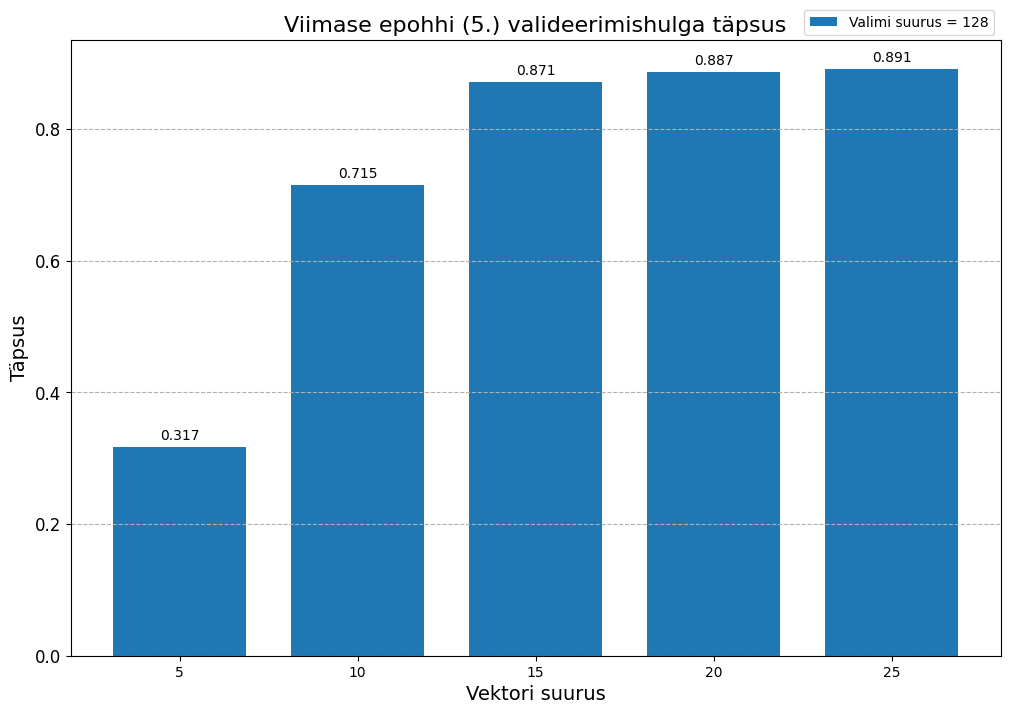

--- 9229.849 seconds ---


In [ ]:
võrkotsing()

y andmete kogumine
y andmed kogutud

MultiLabelBinarizer kohandamine
MultiLabelBinarizer kohandatud

X andmete (sõnaliigid) kogumine ja ümbertöötlemine
X andmed (sõnaliigid) kogutud ja ümbertöödeldud
MultiLabelBinarizer kohandamine
MultiLabelBinarizer kohandatud

Otsin olemasolevat TextVectorization
Leidsin olemasoleva TextVectorization
TextVectorization käes/kohandatud

Jagan X ja y hulkadesse
X ja y hulkadesse jaotatud

X hulkade teisendamine


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) [' ', "'", ',', 'A', 'C', 'D', 'G', 'H', 'I', 'J', 'K', 'N', 'O', 'P', 'S', 'U', 'V', 'X', '[', ']'] will be ignored
  warnings.warn(


X hulgad teisendatud

y hulkade teisendamine
y hulgad teisendatud

X teisendus

Kokku: 2240515
Treeninghulk: 1792412 : 1792412
Testhulk: 224051 : 224051
Valideerimishulk: 224052 : 224052
X teisendamta


,Sõnad,Sõnaliigid
92197,arvutamisil,['S']
1053271,maksideks,['S']
1968929,tõenäoliseilt,['A']
1971579,tõmbamises,['S']
1859109,teenindasid,['V']


X teisendatud


<tf.Tensor: shape=(5, 5), dtype=int64, numpy=
array([[ 6, 14, 15,  8,  5],
       [12,  6, 11,  3,  4],
       [ 5, 22,  2, 10, 21],
       [ 5, 22, 12, 20,  6],
       [ 5,  2,  2, 10,  4]])>

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])


y teisendus

Kokku: 2240515
Treeninghulk: 1792412
Testhulk: 224051
Valideerimishulk: 224052
y teisendamata


92197      [['12']]
1053271    [['16']]
1968929    [['10']]
1971579    [['12']]
1859109    [['27']]
Name: Muuttüübid, dtype: object

y teisendatud


array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0]])

Muuttüüpide klassid: ["['-']" "['0']" "['1']" "['10', '12']" "['10']" "['11', '9']" "['11']"
 "['12', '10']" "['12']" "['13']" "['14']" "['15']" "['16']" "['17']"
 "['18']" "['19', '2']" "['19']" "['2']" "['20']" "['21']" "['22']"
 "['23', '22']" "['23']" "['24']" "['25']" "['26']" "['27']"
 "['28', '27']" "['28']" "['29']" "['3', '5']" "['3']" "['30']"
 "['31', '27']" "['31']" "['32']" "['33']" "['34']" "['35']" "['36']"
 "['37']" "['38']" "['4']" "['5', '7']" "['5']" "['6']" "['7']" "['8']"
 "['9']"]
49 klassi

Sõnaliikide klassid: ['n' 'u' 'v']
3 klassi

Mudeli ülesehitamine
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 sõna (InputLayer)           [(None, 5)]                  0         []                            
                                                                                                  
 s

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) [' ', "'", ',', 'A', 'C', 'D', 'G', 'H', 'I', 'J', 'K', 'N', 'O', 'P', 'S', 'U', 'V', 'X', '[', ']'] will be ignored
  warnings.warn(


X hulgad teisendatud

y hulkade teisendamine
y hulgad teisendatud

X teisendus

Kokku: 2240515
Treeninghulk: 1792412 : 1792412
Testhulk: 224051 : 224051
Valideerimishulk: 224052 : 224052
X teisendamta


,Sõnad,Sõnaliigid
92197,arvutamisil,['S']
1053271,maksideks,['S']
1968929,tõenäoliseilt,['A']
1971579,tõmbamises,['S']
1859109,teenindasid,['V']


X teisendatud


<tf.Tensor: shape=(5, 10), dtype=int64, numpy=
array([[ 5, 12, 15,  8,  6,  5, 13,  4,  3,  4],
       [13,  5, 10,  3,  4, 11,  2, 10,  3,  0],
       [ 6, 21,  2,  9, 20, 14,  7,  4,  3,  2],
       [ 6, 21, 13, 22,  5, 13,  4,  3,  2,  3],
       [ 6,  2,  2,  9,  4,  9, 11,  5,  3,  4]])>

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])


y teisendus

Kokku: 2240515
Treeninghulk: 1792412
Testhulk: 224051
Valideerimishulk: 224052
y teisendamata


92197      [['12']]
1053271    [['16']]
1968929    [['10']]
1971579    [['12']]
1859109    [['27']]
Name: Muuttüübid, dtype: object

y teisendatud


array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0]])

Muuttüüpide klassid: ["['-']" "['0']" "['1']" "['10', '12']" "['10']" "['11', '9']" "['11']"
 "['12', '10']" "['12']" "['13']" "['14']" "['15']" "['16']" "['17']"
 "['18']" "['19', '2']" "['19']" "['2']" "['20']" "['21']" "['22']"
 "['23', '22']" "['23']" "['24']" "['25']" "['26']" "['27']"
 "['28', '27']" "['28']" "['29']" "['3', '5']" "['3']" "['30']"
 "['31', '27']" "['31']" "['32']" "['33']" "['34']" "['35']" "['36']"
 "['37']" "['38']" "['4']" "['5', '7']" "['5']" "['6']" "['7']" "['8']"
 "['9']"]
49 klassi

Sõnaliikide klassid: ['n' 'u' 'v']
3 klassi

Mudeli ülesehitamine
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 sõna (InputLayer)           [(None, 10)]                 0         []                            
                                                                                                  
 s

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) [' ', "'", ',', 'A', 'C', 'D', 'G', 'H', 'I', 'J', 'K', 'N', 'O', 'P', 'S', 'U', 'V', 'X', '[', ']'] will be ignored
  warnings.warn(


X hulgad teisendatud

y hulkade teisendamine
y hulgad teisendatud

X teisendus

Kokku: 2240515
Treeninghulk: 1792412 : 1792412
Testhulk: 224051 : 224051
Valideerimishulk: 224052 : 224052
X teisendamta


,Sõnad,Sõnaliigid
92197,arvutamisil,['S']
1053271,maksideks,['S']
1968929,tõenäoliseilt,['A']
1971579,tõmbamises,['S']
1859109,teenindasid,['V']


X teisendatud


<tf.Tensor: shape=(5, 15), dtype=int64, numpy=
array([[ 3, 11, 15,  8,  6,  3, 14,  4,  5,  4,  7,  0,  0,  0,  0],
       [14,  3,  9,  5,  4, 12,  2,  9,  5,  0,  0,  0,  0,  0,  0],
       [ 6, 21,  2, 10, 20, 13,  7,  4,  5,  2,  4,  7,  6,  0,  0],
       [ 6, 21, 14, 22,  3, 14,  4,  5,  2,  5,  0,  0,  0,  0,  0],
       [ 6,  2,  2, 10,  4, 10, 12,  3,  5,  4, 12,  0,  0,  0,  0]])>

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])


y teisendus

Kokku: 2240515
Treeninghulk: 1792412
Testhulk: 224051
Valideerimishulk: 224052
y teisendamata


92197      [['12']]
1053271    [['16']]
1968929    [['10']]
1971579    [['12']]
1859109    [['27']]
Name: Muuttüübid, dtype: object

y teisendatud


array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0]])

Muuttüüpide klassid: ["['-']" "['0']" "['1']" "['10', '12']" "['10']" "['11', '9']" "['11']"
 "['12', '10']" "['12']" "['13']" "['14']" "['15']" "['16']" "['17']"
 "['18']" "['19', '2']" "['19']" "['2']" "['20']" "['21']" "['22']"
 "['23', '22']" "['23']" "['24']" "['25']" "['26']" "['27']"
 "['28', '27']" "['28']" "['29']" "['3', '5']" "['3']" "['30']"
 "['31', '27']" "['31']" "['32']" "['33']" "['34']" "['35']" "['36']"
 "['37']" "['38']" "['4']" "['5', '7']" "['5']" "['6']" "['7']" "['8']"
 "['9']"]
49 klassi

Sõnaliikide klassid: ['n' 'u' 'v']
3 klassi

Mudeli ülesehitamine
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 sõna (InputLayer)           [(None, 15)]                 0         []                            
                                                                                                  
 s

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) [' ', "'", ',', 'A', 'C', 'D', 'G', 'H', 'I', 'J', 'K', 'N', 'O', 'P', 'S', 'U', 'V', 'X', '[', ']'] will be ignored
  warnings.warn(


X hulgad teisendatud

y hulkade teisendamine
y hulgad teisendatud

X teisendus

Kokku: 2240515
Treeninghulk: 1792412 : 1792412
Testhulk: 224051 : 224051
Valideerimishulk: 224052 : 224052
X teisendamta


,Sõnad,Sõnaliigid
92197,arvutamisil,['S']
1053271,maksideks,['S']
1968929,tõenäoliseilt,['A']
1971579,tõmbamises,['S']
1859109,teenindasid,['V']


X teisendatud


<tf.Tensor: shape=(5, 20), dtype=int64, numpy=
array([[ 3, 11, 15,  8,  6,  3, 14,  4,  5,  4,  7,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [14,  3,  9,  5,  4, 12,  2,  9,  5,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 6, 21,  2, 10, 20, 13,  7,  4,  5,  2,  4,  7,  6,  0,  0,  0,
         0,  0,  0,  0],
       [ 6, 21, 14, 22,  3, 14,  4,  5,  2,  5,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 6,  2,  2, 10,  4, 10, 12,  3,  5,  4, 12,  0,  0,  0,  0,  0,
         0,  0,  0,  0]])>

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])


y teisendus

Kokku: 2240515
Treeninghulk: 1792412
Testhulk: 224051
Valideerimishulk: 224052
y teisendamata


92197      [['12']]
1053271    [['16']]
1968929    [['10']]
1971579    [['12']]
1859109    [['27']]
Name: Muuttüübid, dtype: object

y teisendatud


array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0]])

Muuttüüpide klassid: ["['-']" "['0']" "['1']" "['10', '12']" "['10']" "['11', '9']" "['11']"
 "['12', '10']" "['12']" "['13']" "['14']" "['15']" "['16']" "['17']"
 "['18']" "['19', '2']" "['19']" "['2']" "['20']" "['21']" "['22']"
 "['23', '22']" "['23']" "['24']" "['25']" "['26']" "['27']"
 "['28', '27']" "['28']" "['29']" "['3', '5']" "['3']" "['30']"
 "['31', '27']" "['31']" "['32']" "['33']" "['34']" "['35']" "['36']"
 "['37']" "['38']" "['4']" "['5', '7']" "['5']" "['6']" "['7']" "['8']"
 "['9']"]
49 klassi

Sõnaliikide klassid: ['n' 'u' 'v']
3 klassi

Mudeli ülesehitamine
Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 sõna (InputLayer)           [(None, 20)]                 0         []                            
                                                                                                  
 s

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) [' ', "'", ',', 'A', 'C', 'D', 'G', 'H', 'I', 'J', 'K', 'N', 'O', 'P', 'S', 'U', 'V', 'X', '[', ']'] will be ignored
  warnings.warn(


X hulgad teisendatud

y hulkade teisendamine
y hulgad teisendatud

X teisendus

Kokku: 2240515
Treeninghulk: 1792412 : 1792412
Testhulk: 224051 : 224051
Valideerimishulk: 224052 : 224052
X teisendamta


,Sõnad,Sõnaliigid
92197,arvutamisil,['S']
1053271,maksideks,['S']
1968929,tõenäoliseilt,['A']
1971579,tõmbamises,['S']
1859109,teenindasid,['V']


X teisendatud


<tf.Tensor: shape=(5, 25), dtype=int64, numpy=
array([[ 3, 11, 15,  8,  6,  3, 14,  4,  5,  4,  7,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [14,  3,  9,  5,  4, 12,  2,  9,  5,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 6, 21,  2, 10, 20, 13,  7,  4,  5,  2,  4,  7,  6,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 6, 21, 14, 22,  3, 14,  4,  5,  2,  5,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 6,  2,  2, 10,  4, 10, 12,  3,  5,  4, 12,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0]])>

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])


y teisendus

Kokku: 2240515
Treeninghulk: 1792412
Testhulk: 224051
Valideerimishulk: 224052
y teisendamata


92197      [['12']]
1053271    [['16']]
1968929    [['10']]
1971579    [['12']]
1859109    [['27']]
Name: Muuttüübid, dtype: object

y teisendatud


array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0]])

Muuttüüpide klassid: ["['-']" "['0']" "['1']" "['10', '12']" "['10']" "['11', '9']" "['11']"
 "['12', '10']" "['12']" "['13']" "['14']" "['15']" "['16']" "['17']"
 "['18']" "['19', '2']" "['19']" "['2']" "['20']" "['21']" "['22']"
 "['23', '22']" "['23']" "['24']" "['25']" "['26']" "['27']"
 "['28', '27']" "['28']" "['29']" "['3', '5']" "['3']" "['30']"
 "['31', '27']" "['31']" "['32']" "['33']" "['34']" "['35']" "['36']"
 "['37']" "['38']" "['4']" "['5', '7']" "['5']" "['6']" "['7']" "['8']"
 "['9']"]
49 klassi

Sõnaliikide klassid: ['n' 'u' 'v']
3 klassi

Mudeli ülesehitamine
Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 sõna (InputLayer)           [(None, 25)]                 0         []                            
                                                                                                  
 s

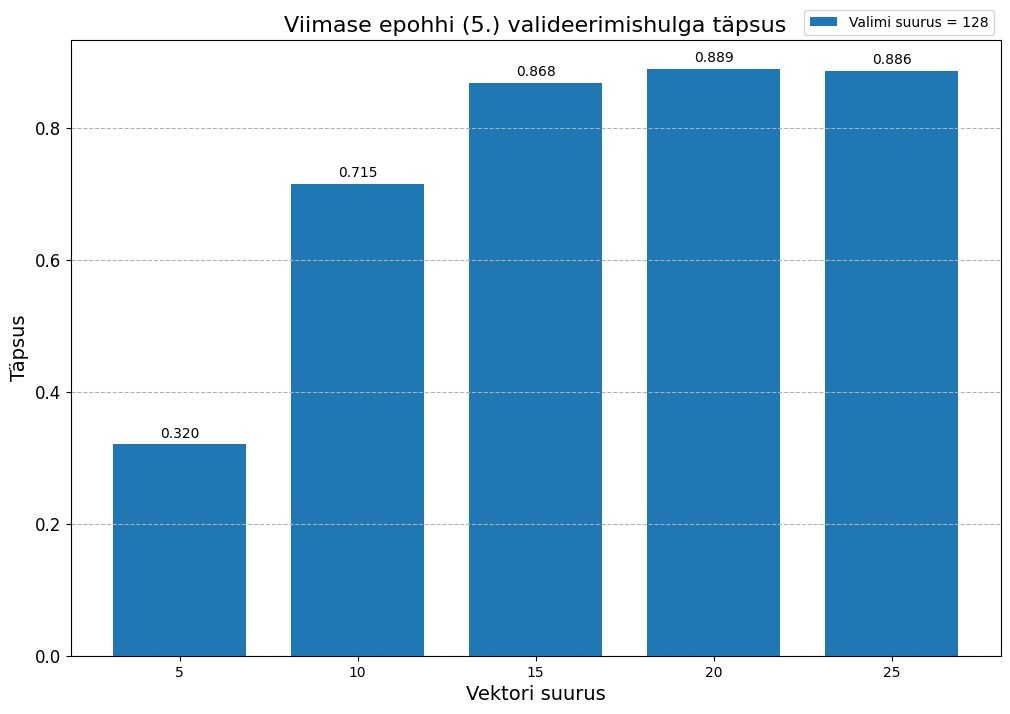

--- 8667.387 seconds ---


In [ ]:
võrkotsing_sõnaliigiga()

Loen tulemused failist history_sõna_max_pikkused_5-25_batch_size_128_epochs_5.npy
Tulemused failist loetud
Salvestan tulemused numpy'iga
Tulemused salvestatud faili history_sõna_dropout_0_max_pikkus_20_batch_sizes_64-512_epochs_5
Väljastan tulemused



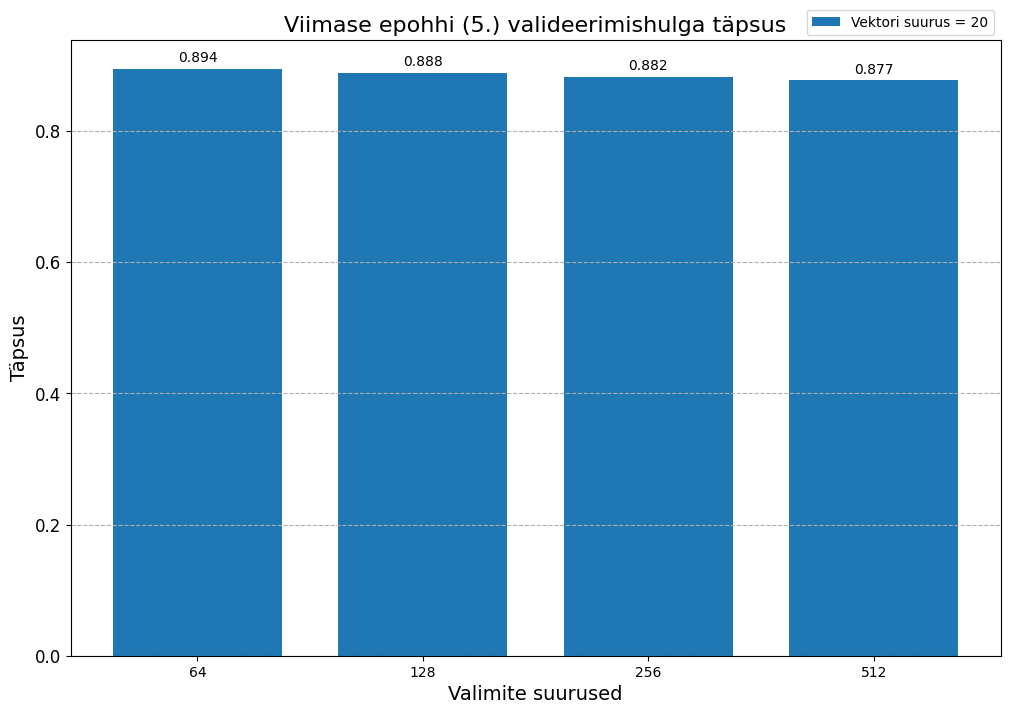

In [ ]:
tulemused = loe_tulemused("history_sõna_max_pikkused_5-25_batch_size_128_epochs_5.npy")
mudel = "s"
max_pikkused = [20] # 27
batch_sizes = [64, 128, 256, 512]
#max_pikkused = [5, 10, 15, 20, 25] # 27
#batch_sizes = [128]
dropout = "0"
epochs = 5

match mudel:
  case "s":
    save_tulemused(tulemused, max_pikkused, batch_sizes, epochs, "sõna", dropout)
    näita_tulemusi_tulp(tulemused, max_pikkused, batch_sizes, epochs, "sõnamudel", dropout)
  case "ss":
    save_tulemused(tulemused, max_pikkused, batch_sizes, epochs, "sõnajasõnaliik", dropout)
    näita_tulemusi_tulp(tulemused, max_pikkused, batch_sizes, epochs, "sõnajasõnaliikmudel", dropout)

#### Mudel

##### Vana

In [ ]:
#andmestik = sõna_grupid_võtmed[:len(sõna_grupid_võtmed)]

In [ ]:
#treening_võtmed, test_võtmed = sk.model_selection.train_test_split(andmestik, test_size=0.2, random_state=42)
#test_võtmed, valideerimis_võtmed = sk.model_selection.train_test_split(test_võtmed, test_size=0.5, random_state=42)

In [ ]:
#treeninghulk = pd.concat([sõna_grupid.get_group(key) for key in treening_võtmed])
#testhulk = pd.concat([sõna_grupid.get_group(key) for key in test_võtmed])
#valideerimishulk = pd.concat([sõna_grupid.get_group(key) for key in valideerimis_võtmed])
#
## Display the size of each set
#print(f"Treeninghulga suurus: {len(treeninghulk)}")
#print(f"Testhulga suurus: {len(testhulk)}")
#print(f"Valideerimishulga suurus: {len(valideerimishulk)}")

In [ ]:
#X_treening = treeninghulk['Sõnad'].apply(lambda x: x[-max_pikkus:])
#X_test = testhulk['Sõnad'].apply(lambda x: x[-max_pikkus:])
#X_val = valideerimishulk['Sõnad'].apply(lambda x: x[-max_pikkus:])
#
## mlb.fit_transform(df_algvormidega['Muuttüübid'].apply(lambda x: [x])) # .str.split(',') Mitte splittida komast, jätta mitme muuttüübiga labelid
#y_treening = mlb.transform(treeninghulk['Muuttüübid'])   # .apply(lambda x: [x]))
#y_test = mlb.transform(testhulk['Muuttüübid'])   # .apply(lambda x: [x]))
#y_val = mlb.transform(valideerimishulk['Muuttüübid'])   # .apply(lambda x: [x]))

In [ ]:
#print("\033[1mX transformeeritud\033[0m\n")
#display(treeninghulk.iloc[:5])
#print(X_treening[:5])
#print(X_treening_vect[:5])
#print()
#print("\033[1my transformeeritud\033[0m\n")
#display(treeninghulk['Muuttüübid'].iloc[:5])
#print(y_treening[:5])

In [ ]:
#sõnavara_suurus = tekst_vect.vocabulary_size()
#output_dim = 64 if len(mlb_w.classes_) > 32 else 32
#num_sonaliik = len(mlb_s.classes_)
#
#input_sonad = tf.keras.layers.Input(shape=(max_pikkus,), name='input_sonad')
#input_sonaliik = tf.keras.layers.Input(shape=(num_sonaliik,), name='input_sonaliik')
#
#embedding_words = tf.keras.layers.Embedding(input_dim=sõnavara_suurus, output_dim=output_dim, input_length=max_pikkus, mask_zero=True)(input_sonad)
#embedding_sonaliik = tf.keras.layers.Embedding(input_dim=num_sonaliik, output_dim=output_dim, input_length=num_sonaliik)(input_sonaliik)
#
#flatten_words = tf.keras.layers.Flatten()(embedding_words)
#flatten_sonaliik = tf.keras.layers.Flatten()(embedding_sonaliik)
#
#concatenated_embeddings = tf.keras.layers.Concatenate()([flatten_words, flatten_sonaliik])
#
#reshaped_embeddings = tf.keras.layers.Reshape(target_shape=(1, concatenated_embeddings.shape[1]))(concatenated_embeddings)
#
#lstm_layer1 = tf.keras.layers.LSTM(4, return_sequences=True)(reshaped_embeddings)
#lstm_layer2 = tf.keras.layers.LSTM(16, return_sequences=True)(lstm_layer1)
#lstm_layer3 = tf.keras.layers.LSTM(4, return_sequences=False)(lstm_layer2)
#
#output = tf.keras.layers.Dense(len(mlb_w.classes_), activation='softmax')(lstm_layer3)
#
#mudel = tf.keras.models.Model(inputs=[input_sonad, input_sonaliik], outputs=output)
#mudel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#
#mudel.summary()

In [ ]:
#hist = mudel.fit(
#    x={'input_sonad': X_train_vecs, 'input_sonaliik': sonaliik_vecs[X_train.index]},
#    y=y_train,
#    epochs=7,
#    batch_size=512,
#    validation_data=({'input_sonad': X_val_vecs, 'input_sonaliik': sonaliik_vecs[X_val.index]}, y_val),
#    callbacks=callbacks,
#    verbose=1)

##### Uus

In [ ]:
sõnavara_suurus = tekst_vect.vocabulary_size()
output_dim = 64
mudel = tf.keras.models.Sequential()
mudel.add(tf.keras.layers.Embedding(input_dim=sõnavara_suurus, output_dim=output_dim, input_length=max_pikkus, mask_zero=True))
mudel.add(tf.keras.layers.LSTM(64, return_sequences=False))
mudel.add(tf.keras.layers.Dense(len(mlb_w.classes_), activation='softmax'))
mudel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mudel.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 10, 64)            4288      
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dense_5 (Dense)             (None, 49)                3185      
                                                                 
Total params: 40497 (158.19 KB)
Trainable params: 40497 (158.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
earlystopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3)
# Salvesta senised parimad (maksimaalse täpsusega) kaalud etteantud kausta -
# kui veel parema tulemuse saad, siis kustuta eelmine, salvesta vaid parim.
# Salvesta vaid kaalud - kuna mudeli arhitektuur on meil siin käepärast.
#filepath = "./LSTMmudel"
#modelcheckpoint = tf.keras.callbacks.ModelCheckpoint(
#    filepath = filepath,
#    save_weights_only=True,
#    monitor='val_accuracy',
#    mode='max',
#    save_best_only=True)
callbacks = [earlystopping]

In [ ]:
hist = mudel.fit(X_train_vecs, y_train, epochs=7, batch_size=512, validation_data=(X_val_vecs, y_val), callbacks=callbacks)

Epoch 1/7
3501/3501 [==============================] - 40s 9ms/step - loss: 1.1324 - accuracy: 0.6743 - val_loss: 0.6208 - val_accuracy: 0.8177
Epoch 2/7
3501/3501 [==============================] - 30s 8ms/step - loss: 0.5333 - accuracy: 0.8405 - val_loss: 0.4760 - val_accuracy: 0.8558
Epoch 3/7
3501/3501 [==============================] - 28s 8ms/step - loss: 0.4408 - accuracy: 0.8669 - val_loss: 0.4139 - val_accuracy: 0.8751
Epoch 4/7
3501/3501 [==============================] - 30s 9ms/step - loss: 0.3968 - accuracy: 0.8792 - val_loss: 0.3843 - val_accuracy: 0.8829
Epoch 5/7
3501/3501 [==============================] - 29s 8ms/step - loss: 0.3697 - accuracy: 0.8867 - val_loss: 0.3593 - val_accuracy: 0.8895
Epoch 6/7
3501/3501 [==============================] - 30s 8ms/step - loss: 0.3507 - accuracy: 0.8920 - val_loss: 0.3443 - val_accuracy: 0.8937
Epoch 7/7
3501/3501 [==============================] - 29s 8ms/step - loss: 0.3363 - accuracy: 0.8962 - val_loss: 0.3333 - val_accuracy:

In [ ]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

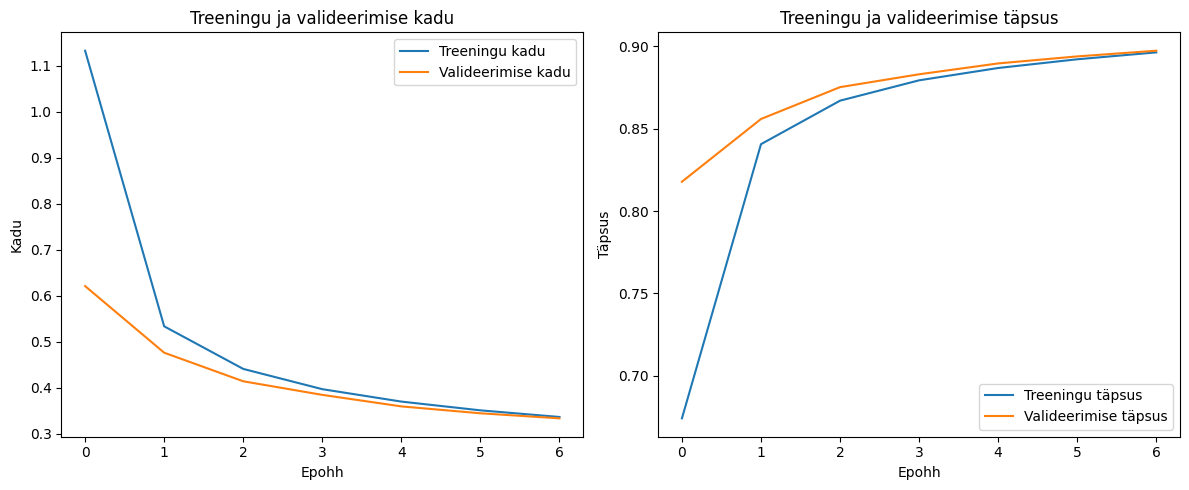

In [ ]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(loss, label='Treeningu kadu')
plt.plot(val_loss, label='Valideerimise kadu')
plt.title('Treeningu ja valideerimise kadu')
plt.xlabel('Epohh')
plt.ylabel('Kadu')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Treeningu täpsus')
plt.plot(val_accuracy, label='Valideerimise täpsus')
plt.title('Treeningu ja valideerimise täpsus')
plt.xlabel('Epohh')
plt.ylabel('Täpsus')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
hinnang = mudel.evaluate(X_test_vecs, y_test)
print("Testhulgal oli täpsus {0}%, kaofunktsiooni väärtus {1}.".format(round(100*hinnang[1], 5),round(hinnang[0],6)))

7002/7002 [==============================] - 25s 4ms/step - loss: 0.3363 - accuracy: 0.8960
Testhulgal oli täpsus 89.59835%, kaofunktsiooni väärtus 0.336305.


In [ ]:
mudel.save("mudel_output_LSTM.keras")

#### Mudeli hindamine

##### Uus

In [ ]:
def hinda_sõnaliigi_kaupa():
  global df_algvormidega
  pos_to_group = {
        'A',  # omadussõna - algvõrre (adjektiiv - positiiv), nii käänduvad kui käändumatud, nt kallis või eht, Adjective
        'C',  # omadussõna - keskvõrre (adjektiiv - komparatiiv), nt laiem, Comparative adjective
        'D',  # määrsõna (adverb), nt kõrvuti, Adverb
        'G',  # genitiivatribuut (käändumatu omadussõna), nt balti, Genitive attribute
        'H',  # pärisnimi, nt Edgar, Proper noun
        'I',  # hüüdsõna (interjektsioon), nt tere, Interjection
        'J',  # sidesõna (konjunktsioon), nt ja, Conjunction
        'K',  # kaassõna (pre/postpositsioon), nt kaudu, Pre/postposition
        'N',  # põhiarvsõna (kardinaalnumeraal), nt kaks, Cardinal numeral
        'O',  # järgarvsõna (ordinaalnumeraal), nt teine, Ordinal numeral
        'P',  # asesõna (pronoomen), nt see, Pronoun
        'S',  # nimisõna (substantiiv), nt asi, Noun
        'U',  # omadussõna - ülivõrre (adjektiiv - superlatiiv), nt pikim, Superlative adjective
        'V',  # tegusõna (verb), nt lugema, Verb
        'X',  # verbi juurde kuuluv sõna, millel eraldi sõnaliigi tähistus puudub, nt plehku, Adverb-like word used solely with a certain verb
        'Y',  # lühend, nt USA, Abbreviation or acronym
        'Z'   # lausemärk, nt -, /, ..., Punctuation
    }
  sõnaliigi_andmed = df_algvormidega[]

##### Vana

In [ ]:
ennustused = mudel.predict(X_test_vecs)

8743/8743 [==============================] - 25s 3ms/step


In [ ]:
print(ennustused[0])
lävend = 0.5
binaarsed_vasted = (ennustused > lävend).astype(int)
print(binaarsed_vasted[0])
print(y_test[0])

[1.31988926e-02 8.62407760e-05 7.39390205e-04 2.02215986e-07
 5.72158740e-07 4.08624510e-06 6.29465887e-07 1.69158932e-06
 1.02777477e-07 5.62962028e-04 2.51663078e-05 2.58273280e-06
 5.12340375e-06 1.01202158e-06 3.02991111e-06 7.16166978e-05
 7.08286234e-06 9.84194636e-01 3.09124130e-06 1.03652847e-05
 1.33009205e-04 5.39791181e-05 1.11806265e-04 7.79880907e-07
 1.66714972e-06 1.61528606e-05 9.13395013e-08 8.02340505e-09
 4.83949636e-09 9.40744097e-12 1.97967791e-04 1.22321333e-04
 2.35641157e-04 1.15985081e-07 3.93845266e-06 3.58664636e-07
 9.34358923e-07 3.39173283e-07 2.04590762e-08 6.20220408e-06
 4.23953068e-08 4.46181105e-07 1.60114748e-08 2.34595027e-05
 1.12537709e-05 3.46609813e-05 4.92035952e-07 1.23932827e-04
 1.87766159e-06]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
täpsus = sk.metrics.accuracy_score(y_test, binaarsed_vasted)
print(f"Testhulga täpsus: {round(täpsus*100, 3)}%")

Testhulga täpsus: 84.065%


In [ ]:
def leia_muuttüüp(sõna, sõnaliik=''):
  global tekst_vect, mudel, muuttüübid
  sisend = [sõna]
  sisend_vect = tekst_vect(sisend)
  sisend_tulemused = mudel.predict(sisend_vect)
  indeks = np.argmax(sisend_tulemused)
  ennustatud_muuttüüp = muuttüübid[indeks]
  return ennustatud_muuttüüp

In [ ]:
leia_muuttüüp("vilistlane")

1/1 [==============================] - 0s 64ms/step


[("['12']",)]

In [ ]:
test = [[3, 5]]
for m_list in test:
  joined = ""
  for i in range(len(m_list)):
    if i == len(m_list) - 1:
      joined += str(m_list[i])
    else:
      joined += str(m_list[i]) + ", "

print(joined)

3, 5
